# Recommendation System for Amazon's Books

### Intro
We are Noam Ophir (209374362) and Iftach Hivner (066542408), final-year students who are deeply passionate about data science. In our quest to find a comprehensive dataset that encompasses various faces of data science, we discovered a website hosting extensive datasets of Amazon product reviews. This discovery sparked our interest, and we decided to focus our project on developing a recommendation system based on these reviews. We aim to explore and apply advanced data science techniques to provide valuable insights and personalized recommendations, enhancing the user experience on e-commerce platforms.

### The Problem
The Problem
Given that Amazon already has its own recommendation system, the motivation for our project was to explore the topic of recommendation systems (a topic we previously had little knowledge about) and enhance the user experience on e-commerce platforms.

This project aims to create a personalized recommendation system for Amazon users. The goal is to help users discover products that match their interests. Traditional search methods often fall short, lacking the personalization that significantly enhances user satisfaction.

By levereging users' behaviors, performing sentiment analysis on review texts and product categories, our recommendation system aims to provide relevant suggestions. We chose to tackle this problem in order to gain a better understanding of this ever-evolving field of data science.

### The data
To obtain the data for our project, we searched the internet for relevant databases. We found suitable datasets at [UC San Diego's Amazon product dataset](https://cseweb.ucsd.edu/~jmcauley/datasets/amazon_v2/). This datasets were already scraped and available, and were used in several research papers.

Given the vast amount of data, which includes recommendations from the entire Amazon website, we decided to focus solely on books—a shared hobby of ours.

## Exploratory Data Analysis

After obtaining the data, we will go on to get a feel of the data and explain our dataset and explain our dataset:

In [ ]:
import pandas as pd
import json
import numpy as np
#import polars as pl
import pyarrow as pa
import pyarrow.parquet as pq
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')

Mounted at /content/drive


The original JSON files were exceedingly large, making it impractical to display all the data at once. To manage this, we downloaded the files and converted them into Parquet format to enhance processing efficiency. Our initial approach involved utilizing both books and Kindle recommendations, complemented by metadata files that researchers had scraped. Below are samples from each dataset, demonstrating the structure and content we worked with.

In [ ]:
#showing random samples from the json
file_path = '/content/drive/MyDrive/Books1.json'
records = []
indices = [0, 49, 199, 499, 999]
max_index = max(indices)

with open(file_path, 'r') as file:
    # Read the file line by line to avoid loading the entire file into memory
    for i, line in enumerate(file):
        if i > max_index:
            break
        if i in indices:
            records.append(json.loads(line.strip()))

df = pd.DataFrame(records)

df.head(5)

overall  verified   reviewTime      reviewerID        asin  \
0      5.0     False  08 12, 2005  A1C6M8LCIX4M6M  0001713353   
1      5.0      True   10 6, 2016   A2CVLIZ9ELU88  0001061240   
2      5.0     False  08 28, 2014  A3S62U3MSPH202  0002005263   
3      5.0      True  03 29, 2017   AFS2HI8Y67T6J  0001384198   
4      3.0      True   01 7, 2014  A331AFVDOICK1E  0001384198   

                                   style     reviewerName  \
0              {'Format:': ' Paperback'}         June Bug   
1              {'Format:': ' Hardcover'}           A.M.H.   
2  {'Format:': ' Mass Market Paperback'}         L. Busse   
3              {'Format:': ' Hardcover'}  Amazon Customer   
4              {'Format:': ' Paperback'}         PinkBird   

                                          reviewText  \
0  This book is a winner with both of my boys.  T...   
1  I had this book as a child and loved it. The c...   
2                                I enjoy these books   
3  Great classic book!  I gave this as a shower g...   
4  I bough this to help my train-loving child wit...   

                                             summary  unixReviewTime  
0                                Children's favorite      1123804800  
1  A wonderful poetry collection with superior co...      1475712000  
2                                         Five Stars      1409184000  
3                                         Five Stars      1490745600  
4                     It's Ok, Not the Best ABC Book      1389052800

The JSON file is organized in a structured manner, containing several key columns:

**overall**: This column represents the rating, ranging from 1 to 5, in integer format.

**verified**: Indicates whether the review is from a verified purchase.

**reviewTime**: The date when the review was posted.

**reviewerID**: A unique identifier for the reviewer.

**asin**: The Amazon Standard Identification Number for the product.

**style**: Describes the format of the product, such as 'Paperback' or 'Kindle Edition.'

**reviewerName**: The name of the reviewer.

**reviewText**: The actual content of the review.

**summary**: A brief summary of the review.

**unixReviewTime**: The date of the review in Unix time format.

Next we will look at some examples of the metadata associated with this file.

In [ ]:
file_path = '/content/drive/MyDrive/meta_Books.json'
records = []
indices = [0, 49, 199, 499, 999]
max_index = max(indices)

with open(file_path, 'r') as file:
    for i, line in enumerate(file):
        if i > max_index:
            break
        if i in indices:
            records.append(json.loads(line.strip()))

df = pd.DataFrame(records)

df.head(5)


category tech1  \
0                                                 []         
1                                                 []         
2                          [Books, Children's Books]         
3  [Books, Biographies & Memoirs, Travelers & Exp...         
4                  [Books, Christian Books & Bibles]         

                                         description fit  \
0  [It is a biology book with God&apos;s perspect...       
1                                                 []       
2  [Another popular character makes an appearance...       
3                [The Picnic & Suchlike Pandemonium]       
4                                [1977 publish date]       

                                               title  \
0  Biology Gods Living Creation Third Edition 10 ...   
1  Bloomberg Businessweek Magazine (April 1, 2013...   
2                     Pookie Believes in Santa Claus   
3              The Picnic &amp; Suchlike Pandemonium   
4                                  Jesus of Nazareth   

                                            also_buy tech2  \
0  [0669009075, B000K2P5SA, B00MD4G2N0, B000ASIPT...         
1                                                 []         
2               [1872885012, 1872885004, 1872885373]         
3                                       [161145865X]         
4   [0060697806, B0182W7JZ6, 0664258077, 0687365902]         

                                 brand feature                   rank  \
0                         Keith Graham      []   1,349,781 in Books (   
1                       Josh Tyrangiel      []  12,376,506 in Books (   
2                          Ivy Wallace      []   2,047,631 in Books (   
3   Visit Amazon's Gerald Durrell Page      []   1,913,645 in Books (   
4  Visit Amazon's William Barclay Page      []     397,999 in Books (   

                                           also_view main_cat similar_item  \
0  [0019777701, B000AUCX7I, B000K2P5SA, B001CK63X...    Books                
1                                                 []    Books                
2  [1872885004, B000MTD6ZK, 0006647324, B000MHT4K...    Books                
3  [0142004413, 161145865X, 1509827137, 156792441...    Books                
4                                       [B000GLU64I]    Books                

  date    price        asin imageURL imageURLHighRes  
0        $39.94  0000092878       []              []  
1         $3.25  000077135X       []              []  
2                0001983806       []              []  
3       $147.77  000216731X       []              []  
4        $16.99  000250653X       []              []

The metadata JSON file, while somewhat unstructured, provides valuable information across several columns:

**category**: Lists the categories the book belongs to.

**tech1 and tech2**: Technical details or specifications (mostly empty).

**description**: A description that also contains reviews of the book.

**fit**: Compatibility or fit information, if applicable (mostly empty).

**title**: The title of the book.

**also_buy**: A list of ASINs for items frequently bought together with this book.

**brand**: The name of the author in multiple formats.

**feature**: features of the book (mostly empty).

**rank**: The book's rank in its main category.

**also_view**: A list of ASINs for items frequently viewed together with this book.

**main_cat**: The main category of the product in amazon (mostly books in our case).

**similar_item**: Items similar to the book (mostly empty).

**date**: The publication date of the book (mostly empty).

**price**: The price of the book.

**asin**: The Amazon Standard Identification Number for the book.

**imageURL and imageURLHighRes**: URLs for images of the book in standard and high resolution (mostly empty).

The **also_view** and **also_buy** columns provide item-based recommendations, with the former showing items frequently viewed together and the latter indicating items frequently bought together.

Next, We will examine the kindle files.

In [ ]:
file_path = '/content/drive/MyDrive/Kindle_Store.json'
records = []
indices = [0, 49, 199, 499, 999]
max_index = max(indices)

with open(file_path, 'r') as file:

    for i, line in enumerate(file):
        if i > max_index:
            break
        if i in indices:
            records.append(json.loads(line.strip()))

df = pd.DataFrame(records)

df.head(5)


overall  verified   reviewTime      reviewerID        asin  \
0      4.0      True  12 29, 2012  A27UD5HYAKBL97  1423600150   
1      5.0      True  09 16, 2013  A3O71TSZWGVPJR  B000FA64QO   
2      1.0     False  02 13, 2003  A33ZYFE8XMKKR1  B000FA5KX2   
3      3.0      True  08 22, 2016  A27FRLI7PFQP37  B000FBFMHU   
4      4.0      True   08 7, 2003  A213YFL3NCBSSL  B000FBFMHU   

                            style   reviewerName  \
0       {'Format:': ' Hardcover'}         Cheryl   
1  {'Format:': ' Kindle Edition'}  Freddy Godden   
2       {'Format:': ' Hardcover'}  P. Scott Pope   
3                             NaN      H. Natola   
4                             NaN       J Zimmer   

                                          reviewText  \
0  If you like making salsas this is a great book...   
1  It's been a long time since I read The New Jed...   
2  There is very little information in this book ...   
3  Up bought this book many years after seeing th...   
4  Frank Abagnale has had an extradordinary life,...   

                                 summary  unixReviewTime vote  
0                             Great Book      1356739200  NaN  
1                          A good filler      1379289600  NaN  
2                                  Avoid      1045094400   10  
3                       Interesting read      1471824000  NaN  
4  Read for the adventure not the dialog      1060214400  NaN

This file is very similar to the previous one. However, we immediately notice issues with the integrity of the data in the style column, which should have exclusively contain Kindle formats. We will explore this discrepancy in more detail later. A new feature present in this file, which was not available in the books.json, is the vote column. This column indicates whether people found the review useful.

We then proceed to the metadata for Kindle.

In [ ]:
file_path = '/content/drive/MyDrive/meta_Kindle_Store.json'
records = []
indices = [0, 49, 199, 499, 999]
max_index = max(indices)

with open(file_path, 'r') as file:

    for i, line in enumerate(file):
        if i > max_index:
            break
        if i in indices:
            records.append(json.loads(line.strip()))

df = pd.DataFrame(records)

df.head(5)

category tech1 description fit  \
0  [Kindle Store, Kindle eBooks, Science Fiction ...                []       
1  [Kindle Store, Kindle eBooks, Literature & Fic...                []       
2  [Kindle Store, Kindle eBooks, Science Fiction ...                []       
3  [Kindle Store, Kindle eBooks, Literature & Fic...                []       
4  [Kindle Store, Kindle eBooks, Literature & Fic...                []       

  title                                           also_buy tech2  \
0                                 [B007NLCJBC, B01FARODH8]         
1        [B000JMKNQ0, B00A9ET67K, B000FA64PK, B000FC1BN...         
2                                                       []         
3                                                       []         
4         [B001CQCAOU, B000SWV6H6, B000SWV6FS, B073P6H5VX]         

                                   brand feature  \
0                       Arthur K. Barnes      []   
1                           Troy Denning      []   
2                          Stephen Adams      []   
3  Visit Amazon's Wendy Etherington Page      []   
4        Visit Amazon's Emilie Rose Page      []   

                               rank                 also_view  \
0  1,716,849 Paid in Kindle Store (  [B000FBF81K, B00PBDMER8]   
1    450,206 Paid in Kindle Store (                        []   
2  3,391,942 Paid in Kindle Store (                        []   
3  2,695,514 Paid in Kindle Store (                        []   
4    674,441 Paid in Kindle Store (              [B000SWV6H6]   

                                             details      main_cat  \
0  {'File Size:': '295 KB', 'Print Length:': '113...  Buy a Kindle   
1  {'File Size:': '1029 KB', 'Print Length:': '10...  Buy a Kindle   
2  {'File Size:': '550 KB', 'Print Length:': '242...  Buy a Kindle   
3  {'File Size:': '479 KB', 'Print Length:': '256...  Buy a Kindle   
4  {'File Size:': '377 KB', 'Print Length:': '192...  Buy a Kindle   

  similar_item date price        asin imageURL imageURLHighRes  
0                          B000FA5KKA       []              []  
1                          B000FBFMVG       []              []  
2                          B000FC1QW4       []              []  
3                          B000MAH9X4       []              []  
4                          B000RH0CQI       []              []

The file is quite similar to the other meta data file we have already encountered

We split all 4 files: meta_Books.json, Books.json, meta_Kindle_Store.json, Kindle_store.json into chunks:

In [ ]:
# Input and output file paths
json_file_path = '/content/drive/MyDrive/Books2.json'
parquet_output_dir = '/content/drive/MyDrive/books-parquet/'

chunk_size = 50000

json_reader = pd.read_json(json_file_path, lines=True, chunksize=chunk_size)

for i, chunk in enumerate(json_reader):

    table = pa.Table.from_pandas(chunk)

    parquet_file_name = f'output_chunk_{i + 1}.parquet'

    parquet_file_path = f'{parquet_output_dir}{parquet_file_name}'

    pq.write_table(table, parquet_file_path)

print(f"Data has been successfully converted to Parquet: {parquet_file_path}")

For the meta files we first coverted them into csv, and then to parquets.
This part was harder than plain code, as some characters prove to be difficult for all this converting process. Thus we used the 'try-except'.

In [ ]:
import pandas as pd

json_file_path = '/content/drive/MyDrive/meta_Books.json'
csv_output_path = '/content/drive/MyDrive/meta-books-csv/'

# Read the JSON file in chunks with error handling and potential escape fixes
chunksize = 20000
chunk_counter = 1

try:
    for chunk in pd.read_json(json_file_path, lines=True, chunksize=chunksize):
        if chunk_counter%200==0:
          print("Current chunk is:", chunk_counter)

        processed_chunk = chunk

        output_filename = f'meta-books-csv-chunk_{chunk_counter}.csv'
        output_filepath = f'{csv_output_path}{output_filename}'

        try:
            processed_chunk.to_csv(output_filepath, index=False, quoting=csv.QUOTE_ALL, escapechar='\\')
            chunk_counter += 1
        except pd.errors.ParserError as e:
            print(f"Error processing chunk {chunk_counter}: {e}")

except pd.errors.ParserError as e:
    print("Error decoding JSON:", e)

print("Processing complete! CSV files saved to:", csv_output_path)

We did the same conversion for the meta files.

In [ ]:
import os
from pathlib import Path

csv_directory = '/content/drive/MyDrive/meta-books-csv/'

parquet_directory = '/content/drive/MyDrive/meta-books-parquet/'

Path(parquet_directory).mkdir(parents=True, exist_ok=True)

csv_files = [file for file in os.listdir(csv_directory) if file.startswith('meta-books-csv') and file.endswith('.csv')]
counter=0

for csv_file in csv_files:
    counter+=1

    df = pd.read_csv(os.path.join(csv_directory, csv_file))

    parquet_file = os.path.join(parquet_directory, csv_file.replace('.csv', '.parquet'))

    df.to_parquet(parquet_file, engine='pyarrow')

print("Conversion completed.")

# *The Beginning of working with the data*
From here we started working with the data itself. We go on to explore the data, find problems, interesting trends and more.

Our first analysis included the count of the number of summaries, how long they are and also show same measures for the reviewText. Therefore, we extracted only those features. The process is  a technicality, and therefore did not put it in this notebook.

In [ ]:
df_summary=pd.read_parquet("/content/drive/MyDrive/summary_only.parquet")

Now we will examine how the distribution of the voting looks like

In [ ]:
base_path = "/content/drive/MyDrive/books_to_kindle_and_books_parquets/books/books_"
extension = ".parquet"

# Number of files
num_files = 7

# Initialize an empty DataFrame to store the results
all_data = pd.DataFrame()

# Loop through the file numbers and read the 'overall' column
for i in range(1, num_files + 1):
    file_path = f"{base_path}{i}{extension}"
    print("i is",i)
    df = pd.read_parquet(file_path, columns=['overall'])
    all_data = pd.concat([all_data, df], ignore_index=True)

In [ ]:
base_path = "/content/drive/MyDrive/books_to_kindle_and_books_parquets/kindle/kindle_"
extension = ".parquet"
num_files = 7

for i in range(1, num_files + 1):
    file_path = f"{base_path}{i}{extension}"
    print("i is",i)
    df = pd.read_parquet(file_path, columns=['overall'])
    all_data = pd.concat([all_data, df], ignore_index=True)

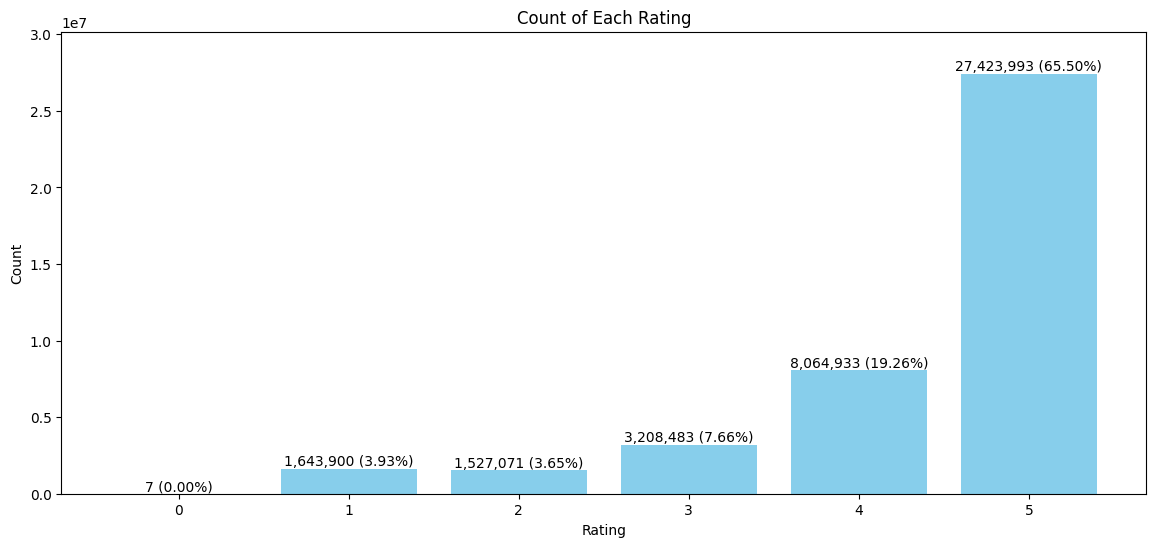

In [ ]:

rating_counts = all_data['overall'].value_counts().sort_index()
total_count = rating_counts.sum()


plt.figure(figsize=(14, 6))
bars = plt.bar(rating_counts.index, rating_counts.values, color='skyblue')


for bar in bars:
    yval = bar.get_height()
    pct = (yval / total_count) * 100
    plt.text(bar.get_x() + bar.get_width()/2, yval + 5, f'{yval:,} ({pct:.2f}%)', ha='center', va='bottom', fontsize=10)

plt.xlabel('Rating')
plt.ylabel('Count')
plt.title('Count of Each Rating')
plt.xticks(rating_counts.index)
plt.ylim(0, rating_counts.max() * 1.1)  # Adding some space on top
plt.show()

A first and important aspect is to check for the missing values. As our dataset is made of reviews and this is what we base our recommendation system on, we need to see if we have enough data.

In [ ]:
df_summary.isna().sum()

summary    11304
dtype: int64

There are only a few missing values for the summaries, which is good. Not many people neglect to write summary, which can provide useful information later.

In [ ]:
df_summary['length'] = df_summary['summary'].apply(lambda x: len(x) if x is not None else 0)


We wanted to check for the distribution of the length of the summaries.

In [ ]:
df_summary['length'].value_counts().sort_index()

length
0        11304
1        12835
2        55886
3       159269
4       348708
         ...  
1451         1
1527         1
1601         1
1730         1
2482         1
Name: count, Length: 643, dtype: int64

We see that some people had very very long summary and most had short. This is why we decided to check for the 90th quantile.

In [ ]:
quantile_90 = df_summary['length'].quantile(0.90)

quantile_90

53.0

As histogram is very easy to see distributions in such manners, we create one.

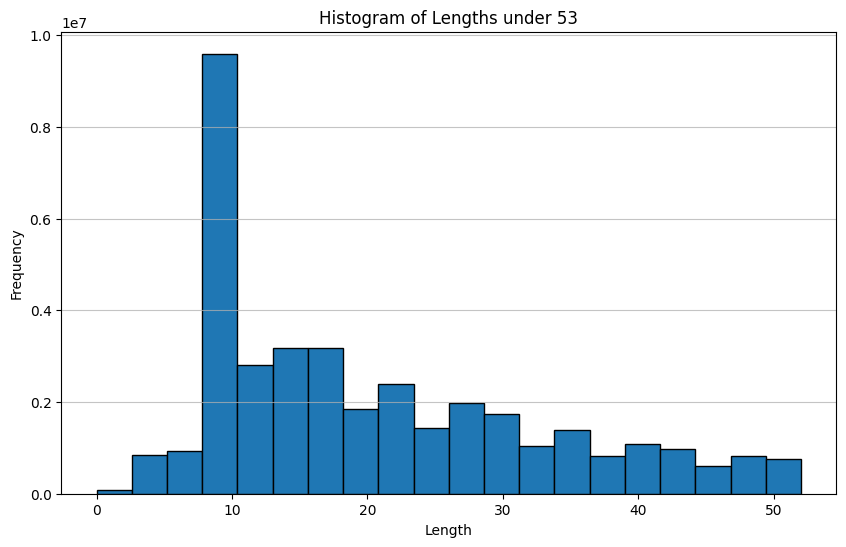

In [ ]:

lengths_under_53 = df_summary[df_summary['length'] < 53]['length']

plt.figure(figsize=(10, 6))
n, bins, patches = plt.hist(lengths_under_53, bins=20, edgecolor='black')

plt.title('Histogram of Lengths under 53')
plt.xlabel('Length')
plt.ylabel('Frequency')

plt.grid(axis='y', alpha=0.75)


plt.show()

The histogram presents in a clear manner the greatest frequency from 1 to 30 and then it starts to diminnish. It shows where most of the length of the summary is.

Next we will conduct a similar analysis for the reviews.

In [ ]:
df_books_review=pd.read_parquet("/content/drive/MyDrive/books_reviewertext_length.parquet")
df_kinlde_review=pd.read_parquet("/content/drive/MyDrive/kindle_reviewertext_length.parquet")

Next, we can observe that all samples contain reviews, indicating the quality of the data. We'll perform this process for both JSON files as part of the exploratory data analysis (EDA) stage to understand the data better.

In [ ]:
df_books_review.isna().sum()

reviewerID    0
length        0
dtype: int64

In [ ]:
df_kinlde_review.isna().sum()

reviewerID    0
length        0
dtype: int64

We see the lengths of reviews both in books and kindle. Later we will create the histograms.

In [ ]:
df_books_review['length'].value_counts().sort_index()

length
0         5695
1         3970
2        31596
3        10865
4        88093
         ...  
34241        1
34254        1
34283        1
34406        1
35094        1
Name: count, Length: 17156, dtype: int64

In [ ]:
df_kinlde_review['length'].value_counts().sort_index()

length
0         4718
1         4276
2        16707
3         6756
4        40894
         ...  
32619        1
32645        1
32768        1
32771        1
33860        1
Name: count, Length: 11274, dtype: int64

Again, we check for the 90th quantile as there are some very long reviews.

In [ ]:
quantile_90 = df_books_review['length'].quantile(0.50)

quantile_90

260.0

In [ ]:
quantile_90 = df_kinlde_review['length'].quantile(0.50)

quantile_90

169.0

In here we see an interesting phenomena. The kindle review median is shorter by 90 words compared to the books. Also surprising is that the median is so high.

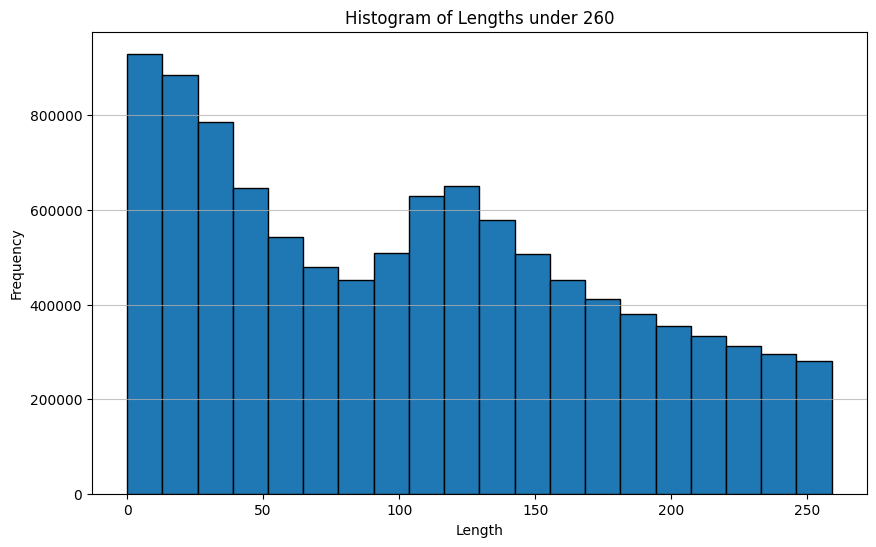

In [ ]:

lengths_under_260 = df_books_review[df_books_review['length'] < 260]['length']

plt.figure(figsize=(10, 6))
n, bins, patches = plt.hist(lengths_under_260, bins=20, edgecolor='black')

plt.title('Histogram of Lengths under 260')
plt.xlabel('Length')
plt.ylabel('Frequency')

plt.grid(axis='y', alpha=0.75)


plt.show()

This histogram presentss a normal idea of distribution of reviews, ranging from very short to very long. We expect to see that most people wrote less than 150 words as time goes by, people invest less and less in writing well reasoned comments and reviews over the internet.

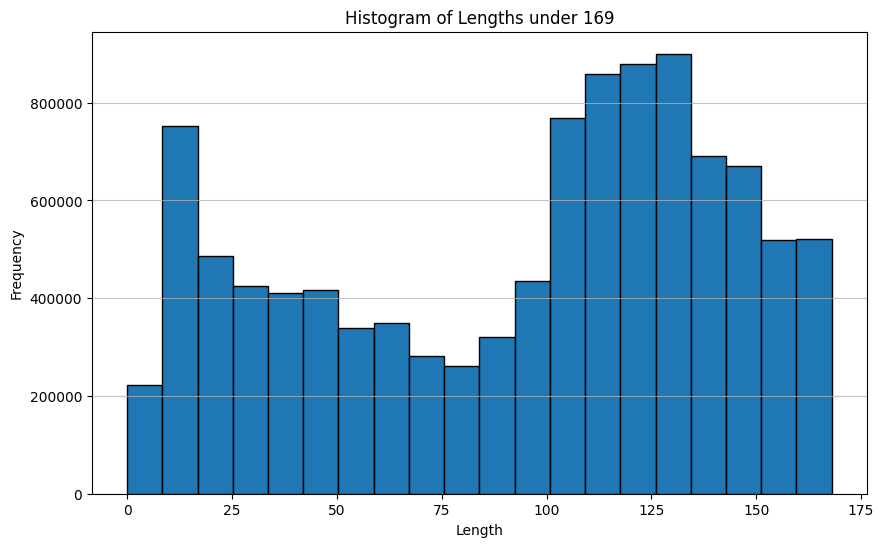

In [ ]:

lengths_under_169 = df_kinlde_review[df_kinlde_review['length'] < 169]['length']

plt.figure(figsize=(10, 6))
n, bins, patches = plt.hist(lengths_under_169, bins=20, edgecolor='black')

plt.title('Histogram of Lengths under 169')
plt.xlabel('Length')
plt.ylabel('Frequency')

plt.grid(axis='y', alpha=0.75)


plt.show()

This histogram was a bit surprising, discovering that over 100 words suddenly have greater frequency compared to shorter reviews. As we have no further information on the people writing reviews, we cannot further dig into it, nor do we think it is of importance.

The next part was to check if users have more than 10 reviews. We have concluded 10 to be the minimal number of reviews we want per user to have, in order to train and test our recommendation system eventually. Otherwise, we cannot predict users' behavior and base the system on this behavior.

We create a file called "Both" that contains 'reviewerID' for each of the 2 files. then we created queries to see how many IDs have more than 10 in both of the sources. This was done in the beginning just to get a first feeling of the data.

In [ ]:
import polars as pl

all_reviewer_ids = pl.DataFrame(schema={'reviewerID': pl.Utf8})  # Use Utf8 for strings

path_to_parquet_files = '/content/drive/MyDrive/books-parquet/'

# Accumulate reviewer IDs
for i in range(1, 1027):

    file_path = path_to_parquet_files + f"output_chunk_{i+1}.parquet"

    df = pl.read_parquet(file_path, columns=["reviewerID"])

    all_reviewer_ids = pl.concat([all_reviewer_ids, df])



In [ ]:
reviewer_ids = pd.DataFrame(all_reviewer_ids)
reviewer_ids.columns = ['reviewerID']
reviewer_ids['source']='books'
#reviewer_ids.to_csv('books_reviewerID.csv', index=False)

In [ ]:
# Group by reviewerID and count the occurrences
reviewer_id_counts = all_reviewer_ids.value_counts().reset_index()
reviewer_id_counts.columns = ['reviewerID', 'count']

# The DataFrame reviewer_id_counts now holds the reviewerID and its count

print(reviewer_ids.head())

       reviewerID  count
0  A1D2C0WDCSHUWZ    697
1  A2F6N60Z96CAJI    479
2  A1K1JW1C5CUSUZ    353
3  A2OJW07GQRNJUT    278
4  A1X8VZWTOG8IS6    243


Exact same process was done for kindle, besides the count.

We added "source" for the files, to know the source of each record. Then we used ploty.express to visualize the amount of reviewers which has reviews in both of the files

In [ ]:

csv_file_path = '/content/drive/MyDrive/books_reviewerID.parquet'
books_df = pd.read_parquet(csv_file_path)
books_df['source']='books'


parquet_file_path = '/content/drive/MyDrive/kindle_reviewerID.parquet'
kindle_df = pd.read_parquet(parquet_file_path)


kindle_df['source'] = 'kindle'


combined_df = pd.concat([books_df, kindle_df], ignore_index=True)


output_file_path = 'reviewerID_both.csv'
combined_df.to_csv(output_file_path, index=False)

#print(f"Data saved to {output_file_path}")

In [ ]:
# Group by reviewerID and count the occurrences of each source
reviewer_source_counts = combined_df.groupby('reviewerID')['source'].value_counts().unstack(fill_value=0)


reviewer_source_counts.reset_index(inplace=True)


reviewer_source_counts.columns = ['reviewerID', 'count_books', 'count_kindle']

print(reviewer_source_counts.head())

reviewer_source_counts.to_csv('grouped_reviewerID_count.csv', index=False)

In [ ]:
reviewer_source_counts=pd.read_csv('/content/drive/MyDrive/grouped_reviewerID_count.csv')

We then visualize the amount of reviews, only for users with over 10 reviews.

In [ ]:
import plotly.express as px

# Filter the DataFrame to include only rows where both counts are greater than 10
filtered_df = reviewer_source_counts[(reviewer_source_counts['count_books'] > 10) &
                                     (reviewer_source_counts['count_kindle'] > 10)]

# Create  scatter plot
fig = px.scatter(filtered_df, x='count_books', y='count_kindle',
                 title='Comparison of Book and Kindle Reviews per Reviewer (Counts > 10)',
                 labels={'count_books': 'Count of Books Reviews', 'count_kindle': 'Count of Kindle Reviews'})


fig.update_layout(
    xaxis=dict(
        scaleanchor='y',
        scaleratio=1),
    yaxis=dict(
        scaleanchor='x',
        scaleratio=1)
)

fig.show()


This graph shows us that there are plenty of people who reviewed both Books and Amazon books. The tendency for the reviewr is a bit stronger for reviewing more books.

Now we show the distribution of reviewrs count, each seperately, book and kindle, for those with over 10 reviews


Now we will create a graph showing the count of reviews in the book file.

In [ ]:
review_counts_books = books_df.groupby('reviewerID').size()
reviewers_with_more_than_10_books = review_counts_books[review_counts_books >= 10]

import plotly.express as px


fig = px.histogram(reviewers_with_more_than_10_books, x=reviewers_with_more_than_10_books.values,
                   nbins=int(reviewers_with_more_than_10_books.max() / 25),
                   labels={'x': 'Review Counts', 'y': 'Number of Reviewers'},
                   title='Distribution of Review Counts per Reviewer')


fig.update_layout(bargap=0.2)
fig.show()

We can see as expected that most people reviewed less than 1000 books and even less than 100.

Next we look for the reviews inside the kindle file.

In [ ]:
review_counts_kindle = kindle_df.groupby('reviewerID').size()
reviewers_with_more_than_10_kindle = review_counts_kindle[review_counts_kindle >= 10]

import plotly.express as px


fig = px.histogram(reviewers_with_more_than_10_kindle, x=reviewers_with_more_than_10_kindle.values,
                   nbins=int(reviewers_with_more_than_10_kindle.max() / 25),
                   labels={'x': 'Review Counts', 'y': 'Number of Reviewers'},
                   title='Distribution of Review Counts per Reviewer')


fig.update_layout(bargap=0.2)
fig.show()

We can see as expected that most people reviewed less than 1000 books and even less than 100.

We want to see if we have enough reviewers-by actual numbers, for taking only those with at least 10 books, as we also wish our recommendation system to work on user-based, and as such, needs to study her preferences.

We can also see some reviewers are really outliers from the graph.

Next, we wanted to check how many users have more than 10 reviews in one but not the other, again, just to get an idea of the data.

In [ ]:
reviewer_source_counts[(reviewer_source_counts['count_books']>10) & (reviewer_source_counts['count_kindle']<10)]

reviewerID  count_books  count_kindle
16        A00037304EKN1SJNQV5A           13             0
17        A000392684P4JNLQRBBW           12             1
73        A0015332H21AK8WZ0ZCS           13             1
216       A0042814FUEOXHEB05SQ           22             3
224       A0044294CPA1QY04FSGM           14             1
...                        ...          ...           ...
15991281         AZZY4W8E5AX2K           26             3
15991322         AZZYKHA63LQ7A           65             2
15991342         AZZYPJRSGXWSK           26             1
15991355         AZZYVTX23JWKM           21             2
15991435         AZZZTAPYKI9RD           11             1

[667392 rows x 3 columns]

In [ ]:
reviewer_source_counts[(reviewer_source_counts['count_books']<10) & (reviewer_source_counts['count_kindle']>10)]

reviewerID  count_books  count_kindle
5040      A10028CM1L3CV8            7            12
5227      A100443KQDL0G9            8            15
6779      A100M0VHTEOWN2            5            11
7139      A100POKZLCEFWI            8            16
8148      A10112P0OZNFRC            9            13
...                  ...          ...           ...
15983430   AZXHRKV6OESUY            9            13
15984443   AZXT63K599YX8            3            12
15987602   AZYSCBAZ940SR            7            26
15988121     AZYYBBC73BQ            3            11
15991074   AZZW5NCOD8IA0            9            19

[4647 rows x 3 columns]

This little analysis provides us with many users who are not dual reviewers, and might behave differently.

### Coherency

Now we want to check if the data is ***coherent***. Therefore we check for the style columns in each of our json files. We have already previously seen that this might be an issue.
An extraction process for the style feature already took place.

In [ ]:
df=pq.read_table('/content/drive/MyDrive/books_only_style_column.parquet')
df=df.to_pandas()
filtered_counts =df['style'].value_counts(sort=True)
print(filtered_counts)

style
{'Format:': ' Kindle Edition'}                 17172000
{'Format:': ' Paperback'}                       8129082
{'Format:': ' Hardcover'}                       5152115
{'Format:': ' Mass Market Paperback'}           1023654
{'Format:': ' Board book'}                       206655
                                                 ...   
{'Color:': ' School Pop', 'Format:': None}            1
{'Format:': ' Videotape'}                             1
{'Color:': ' Super Power', 'Format:': None}           1
{'Format:': ' Puzzle'}                                1
{'Format:': ' Unbound', 'Style:': None}               1
Name: count, Length: 292, dtype: int64


This alone shows us the coherency is a bit problematic, as the dataset should be made for books and kindle, and here we have videotape, puzzle and etc.

We visualize the top 10 styles.

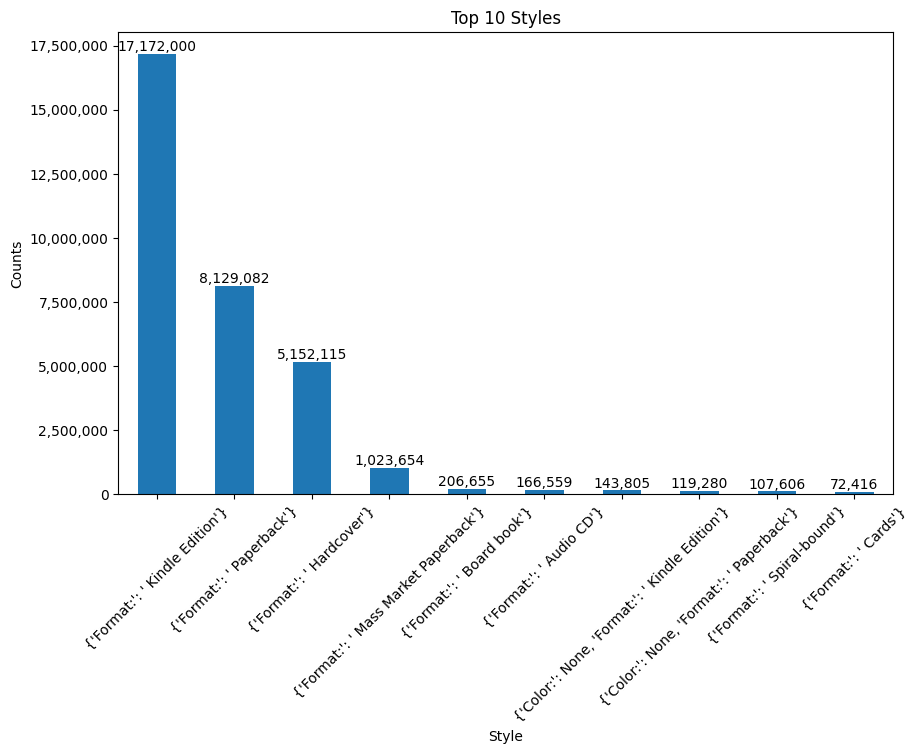

In [ ]:
from matplotlib.ticker import ScalarFormatter
from matplotlib.ticker import FuncFormatter

filtered_counts = df['style'].value_counts(sort=True)

top_10 = filtered_counts.head(10)


plt.figure(figsize=(10, 6))
ax = top_10.plot(kind='bar')
plt.title('Top 10 Styles')
plt.xlabel('Style')
plt.ylabel('Counts')
plt.xticks(rotation=45)


formatter = FuncFormatter(lambda x, pos: '{:,.0f}'.format(x))
ax.yaxis.set_major_formatter(formatter)

for index, value in enumerate(top_10):
    ax.text(index, value, f'{value:,.0f}', ha='center', va='bottom')

plt.show()

This graph shows us the outstanding majority is indeed in the top 4 values of the counts. Thus we can be rest assured we can use those top 4 values only.
An important note is to see even here we find style of Kindle, though this shouldn't have happened, as the books scraping  should exclude the kindle.

Next we conduct the same coherency check for the kindle file.

In [ ]:
df=pd.read_csv('/content/drive/MyDrive/kindle_style_only.csv')
df.columns=[['reviewerID','style']]
filtered_counts =df['style'].value_counts(sort=True)
print(filtered_counts.head())

(style,)                             
{'Format:': ' Kindle Edition'}           5045160
{'Format:': ' Paperback'}                 165154
{'Format:': ' Hardcover'}                  72067
{'Format:': ' Mass Market Paperback'}      10295
{'Format:': ' Audible Audiobook'}           6455
Name: count, dtype: int64


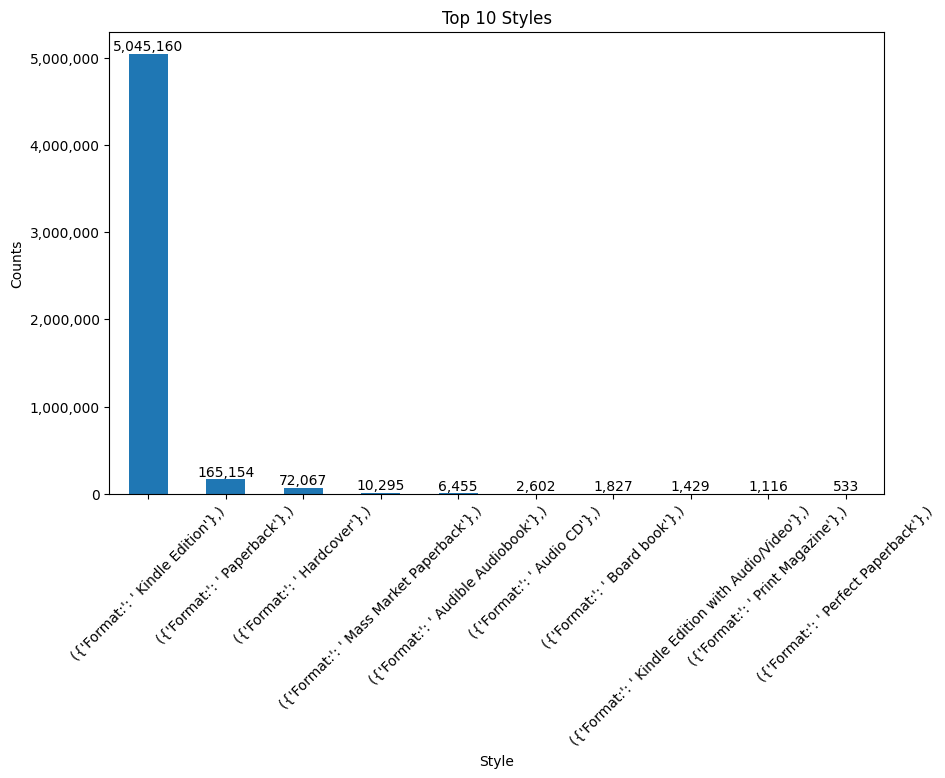

In [ ]:
filtered_counts = df['style'].value_counts(sort=True)


top_10 = filtered_counts.head(10)

# Create a bar graph
plt.figure(figsize=(10, 6))
ax = top_10.plot(kind='bar')
plt.title('Top 10 Styles')
plt.xlabel('Style')
plt.ylabel('Counts')
plt.xticks(rotation=45)


formatter = FuncFormatter(lambda x, pos: '{:,.0f}'.format(x))
ax.yaxis.set_major_formatter(formatter)

for index, value in enumerate(top_10):
    ax.text(index, value, f'{value:,.0f}', ha='center', va='bottom')

plt.show()

This from the kindle file shows us that although the vast majority of the records indeed come from kindle, some of the data is still irrelevant.

We see the data is dirty. Since the files are way too huge to work with limited RAM and our ability to found ways to manipulate and bypass the data, we have decided to move forward only with the books.json file. We have enough reviews as it is. Inside the books.json we also have kindle reviews, as just being found out, and at this point we will treat this category differently.
 We have decided to take  only the first four formats which are:  Kindle Edition, Paperback, Hardcover and Mass Market Paperback. They provide enough records. The rest are not that relevant.

We need to preprocess the files and save them into files we can work with. This involves removing all the irrelevant fields, which are reviewTime,unixReviewTime,Image, and then we divide it into kindle and books.
We created this pre-process seperately and saved into 7 files of regular books and 7 files of kindle.

 An example of how we worked with the first file is shown:

In [ ]:
first_book_after_preprocessing=pl.read_parquet("/content/drive/MyDrive/books_to_kindle_and_books_parquets/books/books_1.parquet")
first_book_after_preprocessing=first_book_after_preprocessing.to_pandas()

We check for unique values in each of the columns.

In [ ]:
column_details = [(column, first_book_after_preprocessing[column].nunique(), first_book_after_preprocessing[column].dtype) for column in first_book_after_preprocessing.columns if column != "style"]
column_summary_df = pd.DataFrame(column_details, columns=['feature name', 'unique', 'type'])
print(column_summary_df)

   feature name   unique    type
0       overall        5   int64
1      verified        2    bool
2    reviewerID  2120679  object
3          asin    70325  object
4  reviewerName  1416147  object
5    reviewText  3485673  object
6       summary  2308730  object
7          vote     1562  object


The result is encouraging. we see that we have a lot of unique reviewers, as well as reviewText, thus no real duplicates. Also the overall rating include only 1-5 numeric as it should be.

The first step would be to treat the Na values

In [ ]:
first_book_after_preprocessing.apply(lambda col: col.isin(["nan", "NaN", "None"]).sum())


overall               0
verified              0
reviewerID            0
asin                  0
style                 0
reviewerName        118
reviewText           86
summary              20
vote            2548621
dtype: int64

We can see that out of 3.4 million reviews, most of the vote values are NaN, and we barely have NaN values in the columns: summary, reviewText. We decided to discarded the vote since it doesn't provide additional information, and also reviewerName, since the system will recommand based on the reviwerID.

In [ ]:
first_book_after_preprocessing.drop(columns=["vote", "reviewerName"], inplace=True)

# Convert "nan", "NaN", "None", and empty strings to np.nan in the new DataFrame
first_book_after_preprocessing.replace(["nan", "NaN", "None", ""], np.nan, inplace=True)

first_book_after_preprocessing.dropna(inplace=True)

Due to different variable type, we would fix the feature to avoid future bugs:


In [ ]:
first_book_after_preprocessing["style"] = first_book_after_preprocessing["style"].astype(str)

In [ ]:
print(first_book_after_preprocessing.duplicated().sum())


3356


Out of the entire first file we barely have any duplicates. We check to see how a sample of the duplicates look like.

In [ ]:
duplicates = first_book_after_preprocessing.duplicated(keep=False)

duplicate_rows = first_book_after_preprocessing[duplicates]

duplicate_rows.head()

overall  verified      reviewerID        asin  \
1007        5     False   AN4RKQM9AYVAD  0001384198   
1008        5     False   AN4RKQM9AYVAD  0001384198   
1170        5      True  A3IVT3UA3ZERWQ  0001381733   
1171        5      True  A3IVT3UA3ZERWQ  0001381733   
1195        5      True  A3PYRSATCV6329  0001381733   

                          style  \
1007  {'Format:': ' Hardcover'}   
1008  {'Format:': ' Hardcover'}   
1170  {'Format:': ' Hardcover'}   
1171  {'Format:': ' Hardcover'}   
1195  {'Format:': ' Hardcover'}   

                                             reviewText  \
1007  I liked this book because it motivated me to d...   
1008  I liked this book because it motivated me to d...   
1170                                        Excellent!!   
1171                                        Excellent!!   
1195                                             A gift   

                                          summary  
1007  This book is good for anyone who have kids.  
1008  This book is good for anyone who have kids.  
1170                                  Excellent!!  
1171                                  Excellent!!  
1195                                   Five Stars

The duplicates appear to be valid reviews that could be used, but given the large volume of data and the insignificant number of duplicates, the safest approach is to remove them.

In [ ]:
first_book_after_preprocessing.drop_duplicates(keep=False, inplace=True)


Another data integrity check we would like to conduct is whether users  reviewed the same book more than once, which is not a common sense.

In [ ]:
reviews_count = first_book_after_preprocessing.groupby(['reviewerID', 'asin']).size().reset_index(name='number_of_reviews').sort_values(by='number_of_reviews', ascending=False)
reviews_count.head()

reviewerID        asin  number_of_reviews
1797847  A2TXR85WQLE32N  0140324623                 57
352583   A1D2C0WDCSHUWZ  000711835X                 35
352629   A1D2C0WDCSHUWZ  0007350783                 20
352554   A1D2C0WDCSHUWZ  0001844423                 17
640152   A1NF9WS7RR82MX  0142800376                 16

In [ ]:
(reviews_count[reviews_count["number_of_reviews"] > 1])["number_of_reviews"].sum()

43520

As this is not the wanted results, we will try to decipher what had happened in the data. We will drill down further into the user with great amount of reviews for the same book. One should notice the reviewerID A1D2C0WDCSHUWZ appears three times and that's why we decided to work with them first:

In [ ]:
filtered_df = first_book_after_preprocessing[(first_book_after_preprocessing['reviewerID'] == 'A1D2C0WDCSHUWZ') & (first_book_after_preprocessing['asin'] == '0007350783')]
filtered_df.head(20)

overall  verified      reviewerID        asin  \
194890        4     False  A1D2C0WDCSHUWZ  0007350783   
195068        4     False  A1D2C0WDCSHUWZ  0007350783   
196692        5     False  A1D2C0WDCSHUWZ  0007350783   
196718        5     False  A1D2C0WDCSHUWZ  0007350783   
196939        5     False  A1D2C0WDCSHUWZ  0007350783   
196940        5     False  A1D2C0WDCSHUWZ  0007350783   
199395        4     False  A1D2C0WDCSHUWZ  0007350783   
199837        5     False  A1D2C0WDCSHUWZ  0007350783   
200148        4     False  A1D2C0WDCSHUWZ  0007350783   
200182        5     False  A1D2C0WDCSHUWZ  0007350783   
200266        5     False  A1D2C0WDCSHUWZ  0007350783   
200283        4     False  A1D2C0WDCSHUWZ  0007350783   
200286        5     False  A1D2C0WDCSHUWZ  0007350783   
200303        5     False  A1D2C0WDCSHUWZ  0007350783   
200326        5     False  A1D2C0WDCSHUWZ  0007350783   
200379        5     False  A1D2C0WDCSHUWZ  0007350783   
200399        5     False  A1D2C0WDCSHUWZ  0007350783   
200415        5     False  A1D2C0WDCSHUWZ  0007350783   
200417        4     False  A1D2C0WDCSHUWZ  0007350783   
200425        5     False  A1D2C0WDCSHUWZ  0007350783   

                                        style  \
194890              {'Format:': ' Hardcover'}   
195068              {'Format:': ' Paperback'}   
196692              {'Format:': ' Paperback'}   
196718              {'Format:': ' Paperback'}   
196939              {'Format:': ' Hardcover'}   
196940              {'Format:': ' Paperback'}   
199395              {'Format:': ' Paperback'}   
199837              {'Format:': ' Paperback'}   
200148              {'Format:': ' Hardcover'}   
200182  {'Format:': ' Mass Market Paperback'}   
200266              {'Format:': ' Paperback'}   
200283              {'Format:': ' Paperback'}   
200286  {'Format:': ' Mass Market Paperback'}   
200303  {'Format:': ' Mass Market Paperback'}   
200326              {'Format:': ' Hardcover'}   
200379              {'Format:': ' Paperback'}   
200399              {'Format:': ' Hardcover'}   
200415              {'Format:': ' Paperback'}   
200417  {'Format:': ' Mass Market Paperback'}   
200425              {'Format:': ' Hardcover'}   

                                               reviewText  \
194890  "Emma Woodhouse, handsome, clever, and rich, w...   
195068  "Emma Woodhouse, handsome, clever, and rich, w...   
196692  Gothic romances were all the rage in the late ...   
196718  In Jane Austen's time, young women were taught...   
196939  Gothic romances were all the rage in the late ...   
196940  One of the Dashwood daughters is smart, down-t...   
199395  "Emma Woodhouse, handsome, clever, and rich, w...   
199837  "Emma Woodhouse, handsome, clever, and rich, w...   
200148  Even the best authors in the world sometimes p...   
200182  "Emma Woodhouse, handsome, clever, and rich, w...   
200266  Jane Austen. Her name is practically synonymou...   
200283  Even the best authors in the world sometimes p...   
200286  In Jane Austen's time, young women were taught...   
200303  "Emma Woodhouse, handsome, clever, and rich, w...   
200326  In Jane Austen's time, young women were taught...   
200379  Jane Austen. Her name is practically synonymou...   
200399  Jane Austen. Her name is practically synonymou...   
200415  Jane Austen. Her name is practically synonymou...   
200417  Gothic romances were all the rage in the late ...   
200425  One of the Dashwood daughters is smart, down-t...   

                                                  summary  
194890  It's such a happiness when good people get tog...  
195068  It's such a happiness when good people get tog...  
196692               When a young lady is to be a heroine  
196718                                           A second  
196939               When a young lady is to be a heroine  
196940                     The sensitive and the sensible  
199395                              It's such a happiness  
199837            

We receievd a strange result, many critics for same books, in different styles. We went back to search for the reviewerName, which is E.A. Solinas.

This means that all the reviews we saw earlier, are reviews that the user did write, however, as we can see, the review was either on the same book Emma, that was in different version in amazon https://www.amazon.com/Emma-Be-Classics-Jane-Austen/dp/0142419680

https://www.amazon.com/Emma-Knickerbocker-Classics-Jane-Austen/dp/1631060708 https://www.amazon.ca/product-reviews/B0C1KX3MQQ/ref=zg_bsnr_1051378_cr_sccl_1/000-0000000-0000000

And also, we found a review that the user wrote on a differnt book by the same author- https://www.amazon.com.au/Northanger-Abbey-Jane-Austen-ebook/dp/B07XXWBYX6

We see that for the same reviewerID, and same asin there are different reviews, which while searching the web shows us different books. The question is whether we can tell which book is really the one that the reviewer had reviewed using the metadata file and perhaps save this data.

In [ ]:
base_file_name = 'meta-books-csv-chunk_{}.parquet'
file_location = '/content/drive/MyDrive/meta-books-parquet/'

start_file_number = 1

meta_books_df = pd.DataFrame()

for file_number in range(start_file_number, end_file_number + 1):
    file_path = file_location + base_file_name.format(file_number)
    df = pd.read_parquet(file_path)
    meta_books_df = pd.concat([meta_books_df, df], ignore_index=True)


In [ ]:
meta_books_df[meta_books_df['asin'] == '0007350783']

category tech1  \
5617  ['Books', 'Literature & Fiction', 'Classics']   NaN   

                                            description  fit  \
5617  ['', 'Jane Austen (17751817) was an English no...  NaN   

                        title  \
5617  Emma (Collins Classics)   

                                               also_buy  tech2  \
5617  ['0141439688', '0141439661', '0141439807', '01...    NaN   

                                brand feature                rank  \
5617  Visit Amazon's Jane Austen Page      []  625,123 in Books (   

                                              also_view main_cat similar_item  \
5617  ['0141439513', '0141439661', '1514696886', '01...    Books          NaN   

     date  price        asin imageURL imageURLHighRes details  
5617  NaN  $3.99  0007350783       []              []     NaN

Counting how many books with the word "Emma" in the title exist.

In [ ]:
meta_books_df[meta_books_df['title'].str.contains("Emma", case=False, na=False)]

category tech1  \
2846                    ['Books', 'Biographies & Memoirs']   NaN   
4759     ['Books', 'Arts & Photography', 'Performing Ar...   NaN   
5617         ['Books', 'Literature & Fiction', 'Classics']   NaN   
7438                                                    []   NaN   
7858     ['Books', 'Literature &amp; Fiction', 'Contemp...   NaN   
...                                                    ...   ...   
2921003  ['Books', 'Medical Books', 'Medicine', '</span>']  None   
2923241                                                 []  None   
2929244                                                 []  None   
2931466  ['Books', 'Literature & Fiction', 'Genre Ficti...  None   
2933574                                                 []  None   

                                               description  fit  \
2846     ['`One of the best (books) I have ever read on...  NaN   
4759                                                    []  NaN   
5617     ['', 'Jane Austen (17751817) was an English no...  NaN   
7438                                              ['', '']  NaN   
7858     ['Artie Hobson here describes the slow decline...  NaN   
...                                                    ...  ...   
2921003                                                 []  NaN   
2923241                                                 []  NaN   
2929244                                                 []  NaN   
2931466                                                 []  NaN   
2933574  ['By Polacco, Patricia ( Author ) [ { Emma Kat...  NaN   

                                                     title  \
2846     Emma's War: Love, Betrayal and Death in the Sudan   
4759                       Undressing Emmanuelle: A Memoir   
5617                               Emma (Collins Classics)   
7438                            EDITING EMMA- NOT-US CA PB   
7858                  Prisoner's Dilemma (Collier Fiction)   
...                                                    ...   
2921003   Clinical Dilemmas in Non-Alcoholic Fatty Live...   
2923241  Life and Work in Middlebury, Vermont, of Emma ...   
2929244  His Five Night Stand: A Bedroom Secrets Romanc...   
2931466  Political Murder: An Elizabeth Thatcher Myster...   
2933574  By Polacco, Patricia ( Author ) [ { Emma Kate[...   

                                                  also_buy  tech2  \
2846     ['0307385906', '0812968859', '178453644X', '15...    NaN   
4759                                        ['B000TXPXAU']    NaN   
5617     ['0141439688', '0141439661', '0141439807', '01...    NaN   
7438                                                    []    NaN   
7858     ['0060975008', '0060975091', '0312423136', '03...    NaN   
...                                                    ...    ...   
2921003                                                 []    NaN   
2923241                                                 []    NaN   
2929244                                                 []    NaN   
2931466  ['B01HYBVT8Y', 'B075FJJ545', 'B075PZFJFQ', 'B0...    NaN   
2933574                                                 []    NaN   

                                         brand feature  \
2846     Visit Amazon's Deborah Scroggins Page      []   
4759        Visit Amazon's Sylvia Kristel Page      []   
5617           Visit Amazon's Jane Austen Page      []   
7438                              CHLOE SEAGER      []   
7858        Visit Amazon's Richard Powers Page      []   
...                                        ...     ...   
2921003                         Roger Williams      []   
2923241                          Ezra Brainerd      []   
2929244                                   None      []   
2931466                            Emma Lathen      []   
2933574                       Patricia Polacco      []   

                                     rank  \
2846                12,801,197 in Books (   
4759                 1,914,793 in Books (   
5617                  

The search has yielded quite a lot of books with the word Emma in their title. The next step is to count how many such books exist with the author Jane Austen in their brand or description feature.

In [ ]:
meta_books_df[ meta_books_df['brand'].str.contains("Jane Austen", case=False, na=False) & meta_books_df['title'].str.contains("Emma", case=False, na=False) ]

category tech1  \
5617         ['Books', 'Literature & Fiction', 'Classics']   NaN   
104629         ['Books', 'Humor & Entertainment', 'Humor']   NaN   
181514   ['Books', 'Literature &amp; Fiction', 'History...   NaN   
297270   ['Books', 'Literature &amp; Fiction', 'History...   NaN   
297590   ['Books', 'Literature &amp; Fiction', 'Classics']   NaN   
394033   ['Books', 'Teen &amp; Young Adult', 'Literatur...   NaN   
447108   ['Books', 'Literature &amp; Fiction', 'Dramas ...  None   
545313       ['Books', 'Literature & Fiction', 'Classics']   NaN   
684514   ['Books', 'Literature &amp; Fiction', 'Classics']  None   
935809       ['Books', 'Literature & Fiction', 'Classics']   NaN   
1086800  ['Books', 'Literature &amp; Fiction', 'Classics']  None   
1354455  ['Books', 'New, Used & Rental Textbooks', 'Hum...   NaN   
1393977  ['Books', 'Literature &amp; Fiction', 'Classics']  None   
1402407  ['Books', 'Literature &amp; Fiction', 'Classics']  None   
1527061                                                 []  None   
1696673  ['Books', 'Literature &amp; Fiction', 'Classics']   NaN   
1937760  ['Books', 'Literature &amp; Fiction', 'History...  None   
2086980                                                 []  None   
2087255  ['Books', 'New, Used &amp; Rental Textbooks', ...  None   
2091761  ['Books', 'New, Used & Rental Textbooks', 'Hum...  None   
2113261  ['Books', 'Literature &amp; Fiction', 'Classics']  None   
2156581  ['Books', 'Literature &amp; Fiction', 'Classics']  None   
2262321      ['Books', 'Literature & Fiction', 'Classics']  None   
2355466  ['Books', 'Literature &amp; Fiction', 'Genre F...   NaN   
2357556  ['Books', 'Teen & Young Adult', 'Literature & ...   NaN   
2457160  ['Books', 'Christian Books & Bibles', 'Literat...   NaN   
2580496                                                 []  None   
2652213  ['Books', 'Literature &amp; Fiction', 'British...  None   
2689836                  ['Books', 'Literature & Fiction']  None   
2721796      ['Books', 'Literature & Fiction', 'Classics']  None   
2775585      ['Books', 'Literature & Fiction', 'Classics']  None   
2779014  ['Books', 'Literature & Fiction', 'History & C...  None   
2808207      ['Books', 'Literature & Fiction', 'Classics']  None   
2877703  ['Books', 'Literature & Fiction', 'World Liter...  None   

                                               description   fit  \
5617     ['', 'Jane Austen (17751817) was an English no...   NaN   
104629   ['&quot;Jane Austen is my favorite author! ......   NaN   
181514   ['', '<b>Jane Austen</b> (17751817) was born i...   NaN   
297270   ['', '<strong>Jane Austen</strong> (17751817) ...   NaN   
297590   ["Emma (1816) is Jane Austen's most characteri...   NaN   
394033                                            ['', '']   NaN   
447108   ['"Jane Austen is my favorite author! ... Shut...   NaN   
545313   ['"How Jane Austen can write!...She is a minia...   NaN   
684514   ['In a publishing career that spanned less tha...   NaN   
935809                            ['Book by Austen, Jane']   NaN   
1086800  ['Hello, Amazon shoppers!', '<b>You can choose...   NaN   
1354455  ['Paperback. Pub Date :2008-11-02 Pages: 80 La...   NaN   
1393977                                           ['', '']   NaN   
1402407  ['Jane Austens (1775-1817) works have enjoyed ...   NaN   
1527061                                                 []   NaN   
1696673  ['"Young readers should relate to an odyssey c...   NaN   
1937760  ['"For classic literature, check out the new "...   NaN   
2086980                                                 []   NaN   
2087255                                           ['', '']   NaN   
2091761  ["Having chosen to publish anonymously during ...   NaN   
2113261  ['', '', 'English novelist Jane Austen came fr...   NaN   
2156581  ["Born December 16, 1775, <b>Jane Austen</b> i...   NaN   
2262321  ["'Jane Austen is my favorite author!... Shut ...   NaN   
2355466                              

In [ ]:
len(reviews_count[reviews_count['number_of_reviews']>1])

51779


Regarding our question, we can't tell which book was it right now, since for same book there are multiple asin, and in the reviews file we saw that for same asin there are multiplte books. Therefore, after we saw that there are only 51779 of reviews that has more than one review for the same book, we decided to drop them.

In [ ]:
review_counts = first_book_after_preprocessing.groupby(['reviewerID', 'asin']).transform('count')

single_reviews = review_counts.max(axis=1) == 1

first_book_single_reviews = first_book_after_preprocessing[single_reviews]

In [ ]:
first_book_single_reviews.shape

(20685219, 9)

The next step was drilling down further into finding out how come there are users who reviewed so many books.
Even under the assusmption of reading a book once per week, 52 books per year, then for 15 years of using Amazon, one reaches to 780 books and this is extreme outlier.

In [ ]:
review_counts_per_reviewer = first_book_single_reviews["reviewerID"].value_counts()
review_counts_per_reviewer.head()

reviewerID
A2F6N60Z96CAJI    3090
AHUT55E980RDR     1285
A1K1JW1C5CUSUZ     997
AKPKPMWM6IIU5      849
AC1K4OQOZ90RS      772
Name: count, dtype: int64

We shall try to characterize their behavior





In [ ]:
first_book_single_reviews["style"] = first_book_single_reviews["style"].astype(str)
first_book_single_reviews[(first_book_single_reviews['reviewerID'] == 'A2F6N60Z96CAJI') ].nunique().reset_index(name='unique_name_count')


<ipython-input-7-e444e4b22369>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  first_book_single_reviews["style"] = first_book_single_reviews["style"].astype(str)


index  unique_name_count
0       overall                  5
1      verified                  1
2    reviewerID                  1
3          asin               3090
4         style                  3
5  reviewerName                  1
6    reviewText               3089
7       summary               3085
8          vote                128

This seems very extra-ordinary and making us think it is not a "legitimate" user. For nnow we have decided to keep those users, because the later stages of creating a recommendation system will limit the reviews per user.

Another data validation we have conducted is to see if same book has multiple asin numbers.

In [ ]:
base_file_name = 'meta-books-csv-chunk_{}.parquet'
file_location = '/content/drive/MyDrive/meta-books-parquet/'

start_file_number = 1
end_file_number = 147

meta_books_df = pd.DataFrame()
for file_number in range(start_file_number, end_file_number + 1):
    file_path = file_location + base_file_name.format(file_number)
    df = pd.read_parquet(file_path)
    meta_books_df = pd.concat([meta_books_df, df], ignore_index=True)

In [ ]:
multiple_asins = meta_books_df.groupby('asin')['title'].agg(nunique='nunique', names='unique')

multiple_asins = multiple_asins[multiple_asins['nunique'] > 1]

In [ ]:
multiple_asins

Empty DataFrame
Columns: [nunique, names]
Index: []

This result is good, since we can see that there are no different titles for same asin.
The next still will be to check if the same book (maybe in different editions or formats) has different asins.

We broswed amazon book store, and searched for popular books, and saw that many of them has different editions, in different formats.

We check it in our meta_books dataset, in order to know what precentege of the data is the same books. We ignore the content within parenthesis in the title, since this is usually indicates different editions, and also, we saw that brand feature contains sometimes book's author, and sometimes author wrapped with text in the format: "Visit Amzaon's {author name} Page". So we would also correct this:

In [ ]:
import re
meta_books_df['title'] = meta_books_df['title'].str.replace(r'\s*\([^)]*\)', '', regex=True)
def extract_author(brand):
    if isinstance(brand, str):
        match = re.search(r"Visit Amazon's (.+?) Page", brand)
        return match.group(1) if match else brand

meta_books_df['brand'] = meta_books_df['brand'].apply(extract_author)

In [ ]:
#Group by 'reviewerID', aggregate to get the count of unique names and the names themselves
same_books = meta_books_df.groupby(['brand', 'title']).size()

same_books = same_books.reset_index()

same_books.columns = ['brand', 'title', 'count']

same_books = same_books[same_books['count'] > 1]
same_books.sort_values(by="count", ascending=False).head()

brand                    title  count
2618416       Tom Taylor                Injustice     39
1731079       Mark Jones           Top Ten Sights     34
1287000    Johanna Spyri                    Heidi     32
280994       Bram Stoker                  Dracula     29
1482589  Kenneth Grahame  The Wind in the Willows     26

We see that some books appear in many versions.

In [ ]:
same_books["count"].sum(), len(meta_books_df)

(68913, 2934949)

This analysis yielded a result of only 2.3% precentages of the metadata, so it is reasonalbe amount for this dataset.

# Extracting features from the reviews

The next steps in this EDA will involve extracting features

## Extracting category

We want to use as much data as we can and compare the relevant models we can create based on our data. One such idea is to use the 'category' value, that can be taken form the "metadata" database, that maps every asin to its category.

In [ ]:
file_path=f"/content/drive/MyDrive/meta-books-parquet/meta_books_chunk_1.parquet"

In [ ]:
df_meta = pl.read_parquet(file_path)
df_meta_pandas = df_meta.to_pandas()

In [ ]:
dataframes = []

for i in range(1, 148):

    file_path = f"/content/drive/MyDrive/meta-books-parquet/meta-books-csv-chunk_{i}.parquet"

    df_meta = pl.read_parquet(file_path)

    df_meta_pandas = df_meta.to_pandas()

    dataframes.append(df_meta_pandas)

combined_df = pd.concat(dataframes, ignore_index=True)

In [ ]:

combined_df['category'] = combined_df['category'].astype(str)

In [ ]:
counting_genres=combined_df['category'].value_counts()

In [ ]:
counting_genres.to_csv("counting_genres.csv")

In [ ]:
counting_genres

category
[]                                                                               389429
['Books', 'Literature &amp; Fiction', 'Genre Fiction']                            70204
['Books', 'History', 'Americas']                                                  68370
['Books', 'New, Used &amp; Rental Textbooks', 'Humanities']                       43530
['Books', 'Literature & Fiction', 'Genre Fiction']                                42191
                                                                                  ...  
['Books', 'History', 'Asia', 'India']                                                 1
['Books', 'Travel', 'Europe', 'Norway', 'General']                                    1
['Books', 'Arts &amp; Photography', 'History &amp; Criticism', 'History']             1
['Books', 'Arts & Photography', 'Individual Artists', "Artists' Books"]               1
['Books', 'Business & Money', 'Marketing & Sales', 'Marketing', 'Multilevel']         1
Name: count, Length: 19

This result shows that some of the genres are very common, and some are quite rare, and the biggest ones are products without genres.

In [ ]:
import ast
def string_to_list(category_string):
    return ast.literal_eval(category_string)

In [ ]:
import re

# Function to extract the desired category based on the input in the metadat file
def extract_category(categories):
    if not categories:
        return "unknown"  # we have edge case of "[]" in the categories, as you can see above
    if len(categories) == 1:
        return categories[0]
    else:
      second_item = categories[1]
      third_item = categories[2] if len(categories) > 2 else None

    # Check for specific categories
    # if the second category is "New, Used & Rental Textbooks" we move to the third item
    if re.match(r'New, Used (&amp;|&) Rental Textbooks', second_item):
        if third_item:
            return third_item
        # this case is when there are only two categories (['Books', 'New, Used &amp; Rental Textbooks'] or ['Books', 'New, Used & Rental Textbooks'])
        return "unknown"
    else:
        # Return the second category, with "&amp" replaced to "&"
        return re.sub(r'&amp;', '&', second_item)
df['category_list'] = df['category'].apply(string_to_list)

# Apply the function to the category column
df['extracted_category'] = df['category_list'].apply(extract_category)

print(df[['extracted_category']])


        extracted_category
0                  unknown
1     Literature & Fiction
2                  History
3               Humanities
4     Literature & Fiction
...                    ...
1957               History
1958                Travel
1959    Arts & Photography
1960    Arts & Photography
1961      Business & Money

[1962 rows x 1 columns]


We took the different 1962 categories and managed to group them into only a few.

In [ ]:
df['extracted_category'] = df['extracted_category'].astype(str)
grouped_df = df.groupby('extracted_category')['count'].sum().reset_index()

In [ ]:
print(grouped_df)

                            extracted_category   count
0                           Arts & Photography  158286
1                        Biographies & Memoirs   91109
2                           Business & Finance    1119
3                             Business & Money   88142
4                       Business &amp; Finance    3814
5                                    Calendars   11047
6                             Children's Books  241105
7                     Christian Books & Bibles  150126
8                      Comics & Graphic Novels   41571
9                   Communication & Journalism      14
10              Communication &amp; Journalism      83
11                            Computer Science     668
12                      Computers & Technology   51133
13                      Cookbooks, Food & Wine   52505
14                      Crafts, Hobbies & Home  100310
15                                   Education    3996
16                        Education & Teaching   43512
17        

We received different 46 categories of which we will work next, even after some more cleaning of them.

Now we combine categories based on common knowledge, and what we think that should be the same category

In [ ]:
replacement_dict = {
    'Business & Finance': 'Business & Money',
    'Business &amp; Finance': 'Business & Money',
    'Communication &amp; Journalism': 'Communication & Journalism',
    'Computers & Technology': 'Computer Science',
    'Education': 'Education & Teaching',
    'Medicine & Health Sciences': 'Medical Books',
    'Medicine &amp; Health Sciences': 'Medical Books',
    'Science & Mathematics': 'Science & Math',
    'Science &amp; Mathematics': 'Science & Math',
    'Social Sciences': 'Politics & Social Sciences',
    'Test Prep & Study Guides': 'Test Preparation',
    'Test Prep &amp; Study Guides': 'Test Preparation'
}


df['extracted_category'] = df['extracted_category'].replace(replacement_dict)

In [ ]:
grouped_df = df.groupby('extracted_category')['count'].sum().reset_index()
print(grouped_df)

                            extracted_category   count
0                           Arts & Photography  158286
1                        Biographies & Memoirs   91109
2                             Business & Money   93075
3                                    Calendars   11047
4                             Children's Books  241105
5                     Christian Books & Bibles  150126
6                      Comics & Graphic Novels   41571
7                   Communication & Journalism      97
8                             Computer Science   51801
9                       Cookbooks, Food & Wine   52505
10                      Crafts, Hobbies & Home  100310
11                        Education & Teaching   47508
12                Engineering & Transportation   51961
13                   Health, Fitness & Dieting   51567
14                                     History  138229
15                                  Humanities   58410
16                       Humor & Entertainment   49991
17        

The final amount of categories we reached is 34 categories including an unknown category.

 Merging the extracted categories (df) after all preprocessing, with the relevant asins from the combnined_df that contains all the metadata categories

In [ ]:
combined_df = combined_df[["category", "asin"]]

In [ ]:
combined_df.head()

category        asin
0                                                 []  0000092878
1  ['Books', 'New, Used & Rental Textbooks', 'Med...  000047715X
2           ['Books', 'Arts & Photography', 'Music']  0000004545
3           ['Books', 'Arts & Photography', 'Music']  0000013765
4                                                 []  0000000116

In [ ]:
result_df = combined_df.merge(df, on='category', how='left')


In [ ]:
result_df= result_df[["asin", "extracted_category"]]

In [ ]:
result_df.to_parquet("asin_to_category.parquet")

Now we combine the first file  we have now in the memory with the asin_to_category, to get the reviews, with their categories

In [ ]:
asin_file=f"/content/drive/MyDrive/asin_to_category.parquet"

## Extracting BOW ,TF-IDF, Embeddings.

In this sub section we will use different models such as TF-IDF, BOW and etc. in order to find new features for our recommendation system later on. As the amount of data is overwhelming, making each part run for ever, we have decided to extract only those users with 50 to 100 reviews in only 2 files, the first one of the books we created and the one of kindle. This guarantees a randomalization, while still include many users with many reviews.

In [ ]:
file_path=f"/content/drive/MyDrive/books_to_kindle_and_books_parquets/books/1_book_after_preprocessing.parquet"
df = pl.read_parquet(file_path)
df_pandas_books = df.to_pandas()

In [ ]:
file_path=f"/content/drive/MyDrive/books_to_kindle_and_books_parquets/kindle/1_kindle_after_preprocessing.parquet"
df = pl.read_parquet(file_path)
df_pandas_kindle = df.to_pandas()

Combining the datasets, as in the end the format (Kindle vs Others) does not add much information for the recommendations

In [ ]:
df_for_recommendation_systems = pd.concat([df_pandas_books, df_pandas_kindle], ignore_index=True)

The reasoning for selecting users with 50 to 100 reviews is as follows: on one hand, we do not want users that reviewed 3000 books, with the same review, because they are not common or legitimate users. On the other hand, we understand that the way recommendation system works is based on data that the user voted, and this is the minimun to make the recommendation system work. Also, some models collapsed while we had other filters such as 10 to 100, and this is just the first file so we had to make a compromise in the end.

In [ ]:
user_counts = df_for_recommendation_systems['reviewerID'].value_counts()
users_with_50_100_reviews = user_counts[(user_counts >= 50) & (user_counts <= 100)]
num_users_50_100_reviews = len(users_with_50_100_reviews)
print(f"Number of users with 50 -100 records: {num_users_50_100_reviews}")


Number of users with 50 -100 records: 2593


In [ ]:
filtered_users = users_with_50_100_reviews.index.tolist()
df_filtered = df_for_recommendation_systems[df_for_recommendation_systems['reviewerID'].isin(filtered_users)]
print("Filtered DataFrame:")
df_filtered

Filtered DataFrame:


overall  verified      reviewerID        asin  \
15             5     False  A3H9YD6K9TVKDP  0001713353   
47             5     False  A3QYDL5CDNYN66  0001061240   
72             5     False  A1BNWEJ7RVPLQ1  0001712799   
98             4     False  A3CKPNSGA7JOLK  0001712799   
106            5     False  A2MOBMVHECYVLE  0002006448   
...          ...       ...             ...         ...   
7008466        5     False  A35Y7MFHCMQSEO  0316364061   
7008601        4      True  A3EBCNHNQIP2Z3  0316403784   
7008602        5     False  A2ADZVJ87N36N4  0316403784   
7008603        3      True  A2C4MKATLLGFB0  0316403784   
7008621        1      True   AML1XEB5E7FX9  0316403784   

                                  style  \
15            {'Format:': ' Hardcover'}   
47            {'Format:': ' Hardcover'}   
72            {'Format:': ' Hardcover'}   
98            {'Format:': ' Hardcover'}   
106           {'Format:': ' Hardcover'}   
...                                 ...   
7008466  {'Format:': ' Kindle Edition'}   
7008601  {'Format:': ' Kindle Edition'}   
7008602  {'Format:': ' Kindle Edition'}   
7008603  {'Format:': ' Kindle Edition'}   
7008621  {'Format:': ' Kindle Edition'}   

                                                reviewText  \
15       Over and over the king has problems.  Fortunat...   
47       This was a favorite. I think it changed my lif...   
72       In this early reader, Dr. Seuss explores the c...   
98       Dr. Suess's scansion and made-up words annoy m...   
106      Christopher Kremmer's book takes you on a jour...   
...                                                    ...   
7008466  Order of the Unicorn is book four in an awesom...   
7008601  This is a fantastic read, until the ending. It...   
7008602  I'll be damned. I never expected a noir novel ...   
7008603  Pop. 1280 is about a sheriff in the Town of Po...   
7008621  At first I thought the characters were a littl...   

                                                summary  __index_level_0__  
15                                        Not Nice Mice                 15  
47                                      Changed my life                 47  
72                  Two thumbs up for this early reader                 72  
98       A fine first read with wonderful illustrations                 98  
106                                   A compelling read                106  
...                                                 ...                ...  
7008466               A dangerous and exciting mission!            3360856  
7008601              Funny, Twisted Southern-Fried Noir            3360991  
7008602                              One of JT's bests.            3360992  
7008603                     Not as good as I had hoped.            3360993  
7008621                                            Dumb            3361011  

[175214 rows x 8 columns]

In [ ]:
df_filtered.to_csv("/content/drive/MyDrive/df_for_recommendations_systems_50_to_100_reviews.csv")

### BOW

The Bag of Words (BOW) model is a feature extraction technique employed in this recommendation system to process the reviewText column. BOW converts unstructured text data into a structured format by creating a vocabulary of unique words from all reviews and representing each review as a vector of word frequencies. This transformation allows the capture of review content while ignoring word order and grammatical structure. By applying BOW to the reviewText, the system converts textual information into numerical data, enabling the recommendation model to identify patterns and relationships within reviews.

While looking for the amount of features we wish to use from BoW we have come once again to the problem of using too much RAM. we have settled for 50 features as some reviews are quite short, and 50 still enable us to capture plenty of different important words, influecning the users' behavior.

In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer(max_features=50,stop_words='english',max_df=0.9)
bow_matrix = vectorizer.fit_transform(df_filtered['reviewText'])
bow_df = pd.DataFrame.sparse.from_spmatrix(bow_matrix, columns=vectorizer.get_feature_names_out())


Saving the bow features. Later we can add it to the original dataframe.

In [ ]:
bow_df.to_csv('/content/drive/MyDrive/bow_df.csv')

In [ ]:
columns = bow_df.columns.tolist()

for i in range(0, len(columns), 10):
    print(", ".join(columns[i:i+10]))

author, best, bit, book, books, character, characters, did, didn, does
don, end, family, going, good, great, history, interesting, just, know
life, like, little, long, lot, love, make, man, new, novel
people, plot, read, reader, reading, really, say, series, story, things
think, time, want, war, way, work, world, writing, written, years


We can see the different words BOW learned such as love, long, good, great, that could have been expected.

### TF-IDF

We then move on to feature extraction using TF-IDF.

In developing a recommendation system for our project, we utilized TF-IDF to extract features from the reviewText column. TF-IDF enhances the basic BOW approach by weighting terms based on their frequency in a document relative to their frequency across all documents in the dataset. This method enables the system to prioritize words that are more discriminative and informative for each review, thereby improving the relevance and precision of the recommendation process.








In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(stop_words='english',max_df=0.9,min_df=0.02,max_features=50)
tfidf_matrix = vectorizer.fit_transform(df_filtered['reviewText'])

print(tfidf_matrix)  # Sparse matrix representation
print(vectorizer.get_feature_names_out())

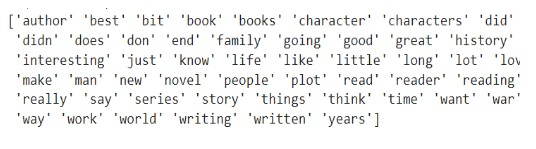

This shows us what TF-IDF learned. They are a bit similar to the BOW, as they come from very similar nature.

In [ ]:
from scipy import sparse
import numpy as nps


# Save the TF-IDF matrix
sparse.save_npz('tfidf_matrix.npz', tfidf_matrix)


np.save('tfidf_vectorizer_features.npy', vectorizer.get_feature_names_out())

Now saving a df with the features.

In [ ]:
tfidf_dense = tfidf_matrix.todense()

tfidf_df = pd.DataFrame(tfidf_dense, columns=vectorizer.get_feature_names_out())

df_combined = pd.concat([df_filtered.reset_index(drop=True), tfidf_df.reset_index(drop=True)], axis=1)

In [ ]:
df_combined.to_csv("/content/drive/MyDrive/df_tf_idf.csv")

### Extracting features using SBert

In order to try a different approach, we have decided to use a more "advanced" model creating embeddings. We have adopted Sentence-BERT (SBERT) to generate embeddings from the reviewText column. Unlike traditional method SBERT transforms each review into a dense vector representation that captures semantic meaning and context. This approach allows the system to understand the inherent similarity between reviews based on their content, rather than just word frequency or occurrence.

In [ ]:
import torch
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')


In [ ]:
df_filtered=pd.read_csv("/content/drive/MyDrive/df_for_recommendations_systems_50_to_100_reviews.csv")

In [ ]:
import torch
from sentence_transformers import SentenceTransformer
import pandas as pd
from tqdm import tqdm
import numpy as np
import gc

# Load SBERT model
model_name = 'sentence-transformers/all-MiniLM-L6-v2'  # A smaller, efficient SBERT model
model = SentenceTransformer(model_name)

# Check if GPU is available and move model accordingly
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(f"Using device: {device}")
model = model.to(device)

batch_size = 500
embeddings_save_dir = "/content/drive/MyDrive/distilled/"
all_embeddings = []

df_filtered = pd.read_csv("/content/drive/MyDrive/df_for_recommendations_systems_50_to_100_reviews.csv")

for i in tqdm(range(0, len(df_filtered), batch_size), desc="Processing batches"):
    batch_texts = df_filtered["reviewText"].iloc[i: i + batch_size].tolist()

    batch_embeddings = model.encode(batch_texts, batch_size=batch_size, show_progress_bar=False, convert_to_tensor=True, device=device)

    all_embeddings.extend(batch_embeddings.cpu().numpy())

    torch.cuda.empty_cache()
    gc.collect()

np.save(f"{embeddings_save_dir}sbert_embeddings.npy", all_embeddings)

all_embeddings = np.load(f"{embeddings_save_dir}sbert_embeddings.npy", allow_pickle=True)
df_filtered["embeddings"] = list(all_embeddings)

df_filtered.to_csv(f"{embeddings_save_dir}sbert_embeddings.csv", index=False)


## Dimensionality reduction

A common problem we encountered was working with a large number of features. To avoid the curse of dimensionality and obtain results that are interpretable and usable, we used dimensionality reduction

In [ ]:
bow_df_for_dr=pd.read_csv('/content/drive/MyDrive/bow_df.csv')

In [ ]:
#concating with the entire df
bow_df_for_dimensionality_reduction=pd.concat([bow_df_for_dr,df_filtered],axis=1)


keeping all of bow, overall(rating) and the style column


In [ ]:
bow_df_for_dimensionality_reduction_filtered=bow_df_for_dimensionality_reduction.iloc[:, list(range(1, 51))]

### PCA

First we resorted to PCA, as the most common and one of the fastest ethod..

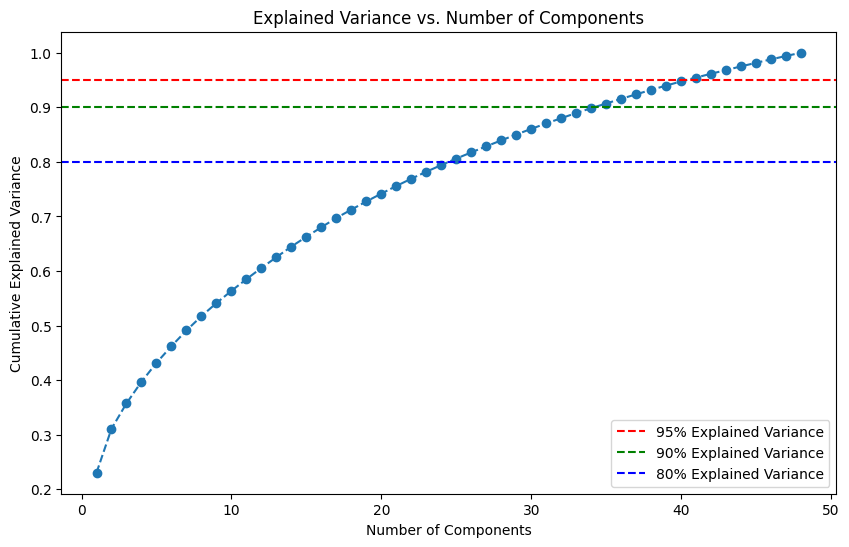

Number of components that explain 95% of the variance: 41
Number of components that explain 90% of the variance: 35
Number of components that explain 80% of the variance: 25


In [ ]:
from sklearn.decomposition import PCA

X = bow_df_for_dimensionality_reduction_filtered.iloc[:, :-2]

pca = PCA()
pca.fit(X)

# Calculate the cumulative explained variance
cumulative_explained_variance = np.cumsum(pca.explained_variance_ratio_)

# Plot the cumulative explained variance
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(cumulative_explained_variance) + 1), cumulative_explained_variance, marker='o', linestyle='--')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Explained Variance vs. Number of Components')
plt.axhline(y=0.95, color='r', linestyle='--', label='95% Explained Variance')
plt.axhline(y=0.90, color='g', linestyle='--', label='90% Explained Variance')
plt.axhline(y=0.80, color='b', linestyle='--', label='80% Explained Variance')
plt.legend()
plt.show()

# Determine the number of components that explain **% of the variance
n_components_95 = np.argmax(cumulative_explained_variance >= 0.95) + 1
print(f'Number of components that explain 95% of the variance: {n_components_95}')


n_components_90 = np.argmax(cumulative_explained_variance >= 0.90) + 1
print(f'Number of components that explain 90% of the variance: {n_components_90}')

n_components_80 = np.argmax(cumulative_explained_variance >= 0.80) + 1
print(f'Number of components that explain 80% of the variance: {n_components_80}')


This graph allows us to understand the ideal number of components for our needs. As much as we would like to use all 50 features, it is better under our computational limits to use only 25 as they explain 80% of the variance, which is satisfactory for the current needs.

Next we will merge it back to the original df and save it for future use.

In [ ]:

n_components_80 = np.argmax(cumulative_explained_variance >= 0.8) + 1
print(f'Number of components that explain 80% of the variance: {n_components_80}')


pca = PCA(n_components=n_components_80)
X_pca = pca.fit_transform(X)


pca_columns = [f'pca_{i+1}' for i in range(n_components_80)]
pca_df = pd.DataFrame(X_pca, columns=pca_columns)

df_with_pca = pd.concat([bow_df_for_dimensionality_reduction_filtered.reset_index(drop=True), pca_df], axis=1)

df_with_pca.head()

Number of components that explain 80% of the variance: 25


author  best  bit  book  books  character  characters  did  didn  does  \
0       0     0    0     1      0          0           0    0     0     0   
1       0     0    0     1      0          0           0    0     0     0   
2       0     0    0     0      0          0           0    0     0     1   
3       0     0    1     2      0          0           0    0     0     0   
4       0     0    0     2      1          0           0    0     0     0   

   ...    pca_16    pca_17    pca_18    pca_19    pca_20    pca_21    pca_22  \
0  ... -0.038481 -0.078307  0.020229 -0.041195  0.015170 -0.156939 -0.091354   
1  ... -0.021586 -0.182302  0.063954 -0.282469 -0.053524 -0.172129 -0.184945   
2  ... -0.457261  0.146258 -0.690896  0.245567  1.344517  0.455241 -0.932067   
3  ... -0.189481 -0.147345  0.018533 -0.343236 -0.401939  0.278119 -0.197931   
4  ...  0.100168 -0.629470  0.395732  0.362874  0.099025 -0.100332 -0.158631   

     pca_23    pca_24    pca_25  
0 -0.119762 -0.136349  0.114998  
1  0.164420 -0.132883 -0.125049  
2  0.751194  0.680877  0.274272  
3 -0.112132 -0.165749  0.011193  
4  0.328904 -0.290690  0.202078  

[5 rows x 75 columns]

In [ ]:
df_with_pca.to_csv("/content/drive/MyDrive/df_with_pca.csv")

### t-SNE

t-SNE is good to use as a dimensionality reduction technique for text because it can capture complex, non-linear relationships between words or documents, making it effective for visualizing semantic similarity. Additionally, t-SNE can handle high-dimensional and sparse data, which are common characteristics of text data. Furthermore, the visualizations produced by t-SNE can provide intuitive insights into the structure and topics present in a text dataset.

t-SNE took forever to run, even when we chose the minimal values possible. In order to overcome this obstacle, we decided to try with PCA first. We chose 40% of the variance just to get a sense of what will happen with this data, and even this small amount of dimensions took way way too long, realising that with the current data and computation power, we can't run T-SNE.
Thus, we have decided to use only 5000 samples- Just to get to know the tool and see if we might be missing anything of great importance.

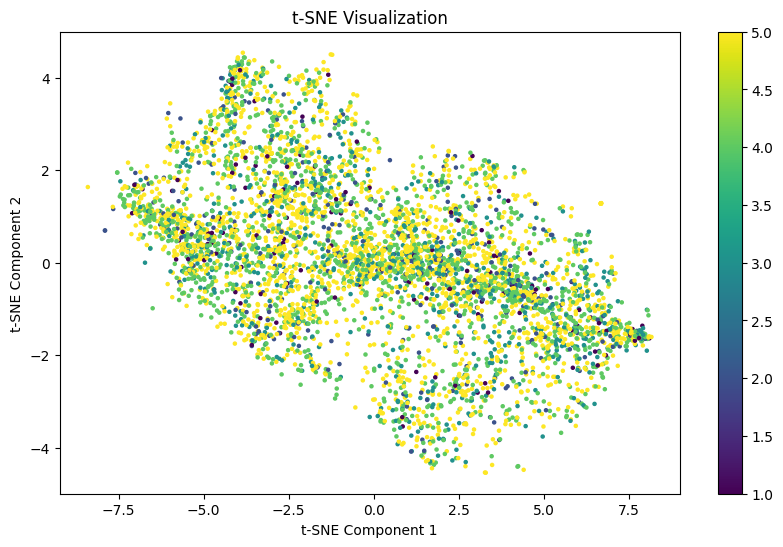

In [ ]:
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

X = bow_df_for_dimensionality_reduction_filtered.iloc[:, :-2].head(5000)

#pca = PCA(n_components=0.4)
#X_pca = pca.fit_transform(X)

# Apply t-SNE on the PCA-transformed data
tsne = TSNE(n_components=2, perplexity=15, n_iter=300)
X_tsne = tsne.fit_transform(X)

# Plot t-SNE results
plt.figure(figsize=(10, 6))
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=bow_df_for_dimensionality_reduction_filtered['overall'].head(5000), cmap='viridis', s=5)
plt.colorbar()
plt.title('t-SNE Visualization')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.show()

The results of running this algorithm has shown no significant patterns or clsutering visible to the maked eye.

### UMAP

UMAP works in a sikmilar fashion to t-SNE with different distribution assumptions of the data.

In [ ]:
#!pip install umap-learn
import matplotlib.pyplot as plt
import umap.umap_ as umap

# Exclude the last two columns (overall and style)
X = bow_df_for_dimensionality_reduction_filtered.iloc[:, :-2]

# Apply UMAP
reducer = umap.UMAP(n_components=3,n_neighbors=40)
X_umap = reducer.fit_transform(X)



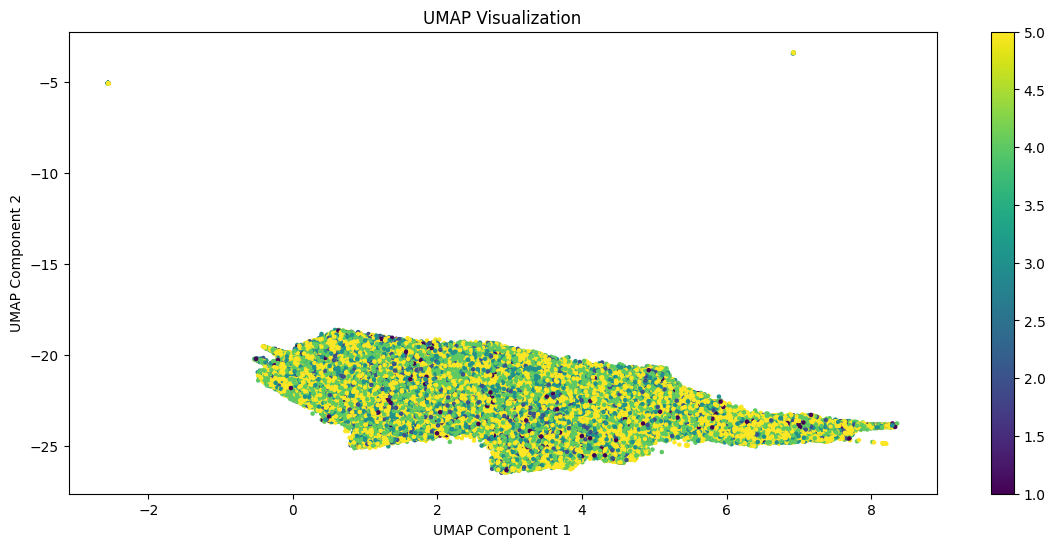

In [ ]:
# Plot UMAP results
plt.figure(figsize=(14, 6))
plt.scatter(X_umap[:, 0], X_umap[:, 1], c=bow_df_for_dimensionality_reduction['overall'], cmap='viridis', s=5)
plt.colorbar()
plt.title('UMAP Visualization')
plt.xlabel('UMAP Component 1')
plt.ylabel('UMAP Component 2')
plt.show()

After trying several paramters tuning which were relevant to our data, we have decided to show this one. This dimensionality reduction is not successful and probably the data with BOW does not fit into this method.

## Clustering

One should note that the data is already clustered on one level, as each of our users has between 50 and 100 reviews. In order to conduct another level of clustering we have decided ******* #TODO COMPLETE!!

## Sentiment

#### Adding sentiment

We are using distilbert-base-uncased-finetuned-sst-2-english model which it's performance considered pretty good, and for each text returns "NEGATIVE", or "POSITIVE" and a number between 0.5 and 1, representing how much positive or negative the sentiment is.

In [ ]:
from transformers import pipeline, DistilBertTokenizer

sentiment_analysis = pipeline('sentiment-analysis', model="distilbert-base-uncased-finetuned-sst-2-english")

# Initialize the tokenizer
tokenizer = DistilBertTokenizer.from_pretrained("distilbert-base-uncased-finetuned-sst-2-english")


In [ ]:
df_filtered=pd.read_csv("/content/drive/MyDrive/df_for_recommendations_systems_50_to_100_reviews.csv")

# Sentiment extraction

An important feature extraction we can create by having reviews of books with texts and summaries, is to extract a ssentiment of the review itself. The review provides more nuanced ideas, than an integer providing an overall rating.

In the following code, we first created a code that uses summary if exists, and only if not we would get the sentiment of the full review text. We saw by manually examiming the created sentiment that the sentiment of the summary usually generate poor results, like a row of 5 star rating, that had a summary "try it" and got 0.6 in the positive sentiment (range is 0.5-1, which means it wasn't adding inforamtion for our model). Then after seeing that sometimes a review of 3, might have very criticizing reveiew text, and some of the 3-stars records do have pretty good reviews, so we decided that we want to run the sentiment for the full review text. However, due to the limitation of 512 tokens maximus passed to sentiment models, and due to the amount of data that needs to be calculated the sentiment of and lack of resources (time and memory this case), we would take only first 512 tokens. For some reason, even that is too much for the sentiment model, so we decreased it even less, so now the model is using only first 510 tokens from every reveiw.

As it is quite heavy to run, we will show some statistics based on only the first 1000. Later we created sentiment (in parts) of all the records and it will be uploaded to the model.

In [ ]:
def get_sentiment_score(row):
    text = row['reviewText']
    if pd.isna(text):
        return None

    # Tokenize the text and truncate to the first 510 tokens
    tokens = tokenizer.encode(text, add_special_tokens=True, max_length=510, truncation=True)

    # Convert tokens back to text string if necessary
    truncated_text = tokenizer.decode(tokens)

    # Perform sentiment analysis
    result = sentiment_analysis(truncated_text)[0]
    if result['label'] == "NEGATIVE":
        score = -result['score']
    else:
        score = result['score']
    return (score, result['label'])  # Return tuple

result_df_head = result_df.head(1000)
result_df_head['sentiment_result'] = result_df_head.apply(get_sentiment_score, axis=1)

In [ ]:
result_df_head[['sentiment_score', 'sentiment_label']] = pd.DataFrame(result_df_head['sentiment_result'].tolist(), index=result_df_head.index)
print(result_df_head.head())

   Unnamed: 0  overall  verified      reviewerID        asin  \
0          15        5     False  A3H9YD6K9TVKDP  0001713353   
1          47        5     False  A3QYDL5CDNYN66  0001061240   
2          72        5     False  A1BNWEJ7RVPLQ1  0001712799   
3          98        4     False  A3CKPNSGA7JOLK  0001712799   
4         106        5     False  A2MOBMVHECYVLE  0002006448   

                       style  \
0  {'Format:': ' Hardcover'}   
1  {'Format:': ' Hardcover'}   
2  {'Format:': ' Hardcover'}   
3  {'Format:': ' Hardcover'}   
4  {'Format:': ' Hardcover'}   

                                          reviewText  \
0  Over and over the king has problems.  Fortunat...   
1  This was a favorite. I think it changed my lif...   
2  In this early reader, Dr. Seuss explores the c...   
3  Dr. Suess's scansion and made-up words annoy m...   
4  Christopher Kremmer's book takes you on a jour...   

                                          summary  __index_level_0__  \
0            

<ipython-input-10-6395239f7345>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  result_df_head[['sentiment_score', 'sentiment_label']] = pd.DataFrame(result_df_head['sentiment_result'].tolist(), index=result_df_head.index)
<ipython-input-10-6395239f7345>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  result_df_head[['sentiment_score', 'sentiment_label']] = pd.DataFrame(result_df_head['sentiment_result'].tolist(), index=result_df_head.index)


In [ ]:
result_df_head["sentiment_label" ].value_counts()

sentiment_label
POSITIVE    742
NEGATIVE    258
Name: count, dtype: int64

We see that the positive vs negative yielded much more positive reviews. It is in accordance with the distribution of the voting distribution we saw earlier, in which most of the votes are 4 and 5.

In [ ]:
result_df_head["sentiment_score" ].describe()

count    1000.000000
mean        0.479695
std         0.844819
min        -0.999821
25%        -0.629244
50%         0.994564
75%         0.999077
max         0.999890
Name: sentiment_score, dtype: float64

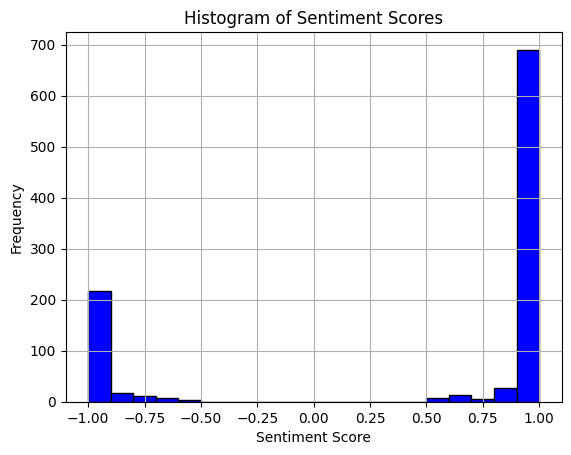

In [ ]:
import matplotlib.pyplot as plt
# Creating a histogram of the sentiment scores
plt.hist(result_df_head["sentiment_score"], bins=20, color='blue', edgecolor='black')
plt.title('Histogram of Sentiment Scores')
plt.xlabel('Sentiment Score')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

As we can see from our sample data, most of the data that is extracted from the review text is either very close to 1 and -1, indicating very positive or negative, and there is a minority of values that is between 0.5-0.9 and -0.5 and -0.9.

The reason why there is no data between -0.5 and 0.5 is that the sentiment values are from 0.5-1 for either positive or negative. This means that 0.4 of positive is equal to 0.6 negative, so the model is trained to decide between negative and positive. Given this distribution of the data, we would like to perform discretization, so eventually there would be only 4 values for the sentiment: values that are positive above 0.9 would be classified as "loved", while those below that would be "liked". For negative sentiment, we would define values above 0.9 as "hated", while those below would be "disliked".

In [ ]:
average_sentiment = result_df_head.loc[(result_df_head['sentiment_score'] > 0.5) & (result_df_head['sentiment_score'] < 0.9)]
average_sentiment.head(20)

Unnamed: 0  overall  verified      reviewerID        asin  \
34         2931        5     False  A1PWJRR0T57SLB  0001720392   
61         3823        5     False  A1V09ASZ9HWQAE  0002051850   
160        8524        4     False  A3QYDL5CDNYN66  0002005549   
164        8559        4     False  A2SLA0SXRQV8M0  0002005549   
175        8756        3     False  A3J0OXB9KIC5SS  0002005549   
187        9059        3     False  A23E9QQHJLNGUI  0002005549   
196        9242        5     False  A1VJU3NG5W15L4  0002005549   
244       11334        4     False   A6Y5R84GTS368  0002226723   
261       12116        4     False  A3NT1B6DGJJWNV  0002173611   
273       12412        5     False   AU7ND6NOCX9IA  0002172690   
292       13215        5     False  A3NUMRC41CR0UU  0001048767   
298       14334        5      True  A3SOV9HFM5H9T1  0001048767   
304       14702        3     False  A2T110FW5JH644  0001048767   
325       15297        5     False  A33FA68V0NCM5E  0001048767   
343       15624        5     False  A2JXAQ92WYPAAR  0002257556   
351       15769        4     False  A1V8NBMG0PDVK1  0002318075   
386       17295        5      True  A2Q03BGZSFQZ2L  0002250101   
396       17882        5     False  A1Y68E3UV5HLSR  0001720295   
400       18193        3     False   AHTQSPGH85SXM  0002160552   
405       18383        5      True  A1OD2BBI9OYSNB  0001720295   

                                     style  \
34               {'Format:': ' Hardcover'}   
61               {'Format:': ' Paperback'}   
160  {'Format:': ' Mass Market Paperback'}   
164  {'Format:': ' Mass Market Paperback'}   
175              {'Format:': ' Hardcover'}   
187              {'Format:': ' Hardcover'}   
196              {'Format:': ' Hardcover'}   
244              {'Format:': ' Paperback'}   
261              {'Format:': ' Paperback'}   
273  {'Format:': ' Mass Market Paperback'}   
292              {'Format:': ' Paperback'}   
298              {'Format:': ' Paperback'}   
304              {'Format:': ' Hardcover'}   
325  {'Format:': ' Mass Market Paperback'}   
343              {'Format:': ' Paperback'}   
351  {'Format:': ' Mass Market Paperback'}   
386              {'Format:': ' Paperback'}   
396              {'Format:': ' Hardcover'}   
400              {'Format:': ' Paperback'}   
405              {'Format:': ' Paperback'}   

                                            reviewText  \
34   The first time I took my brother to the main V...   
61   Controversy has swirled around Ernest Hemingwa...   
160  I liked this book, altho I felt he did too muc...   
164  A very good technological thriller and caution...   
175  If you don't have time to read Crichton's new ...   
187  I have really enjoyed some of Mr. Crichton's b...   
196  Prey is Crichton at his best.\nMeet Jack, out-...   
244  In this ambitious novel, Gaskell superbly depi...   
261  Hughes' account of Australia's beginnings, and...   
273  I'm sure that none of us will be surprised to ...   
292  This year marks my first reading of "Hamlet," ...   
298  This is an important play. The guy who wrote i...   
304  This is the seventh book of the "Masters of Ro...   
325  "Julius Caesar", as a play, breathes the altog...   
343  Hard to believe that Lessing wrote this as a v...   
351  Hercule Poirot has just completed his analysis...   
386  Nearly ten years ago, for reasons I don't reme...   
396  Though I've read The Chronicles of Narnia mult...   
400  Freedom at Midnight is an epic 726 page histor...   
405  (The Inklings Series is a monthly series featu...   

                                               summary  __index_level_0__  \
34                                    Made me smile...               2963   
61             The Book That Ripped the Pulitzer Apart               3861   
160                         A little escapist thriller               9010   
164              Very good techno-thriller by Crichton               9045   
175                       "Andromeda Strain" Re

In [ ]:
def get_sentiment_category(text):
    if pd.isna(text):
        return None

    tokens = tokenizer.encode(text, add_special_tokens=True, max_length=510, truncation=True)

    truncated_text = tokenizer.decode(tokens)

    result = sentiment_analysis(truncated_text)[0]
    score = result['score']
    sentiment = result['label']

    if sentiment == "POSITIVE":
        if score > 0.9:
            category = 3 # "Loved"
        else:
            category = 2 # "Liked"
    elif sentiment == "NEGATIVE":
        if score > 0.9:
            category = 0 # "Hated"
        else:
          category = 1 # "Disliked"

    return category  # Return the category
result_df['sentiment_category'] = result_df["reviewText"].apply(get_sentiment_category)
result_df = result_df.drop(columns=["verified", "reviewText", "summary"])
result_df.to_parquet('/content/drive/MyDrive/books_to_kindle_and_books_parquets/books/books_1_with_sentiment.parquet')
result_df.head()


#Begin of bertviz

We wanted to use Bertviz as BertViz is a tool designed to visually interpret and explore the inner workings of BERT (Bidirectional Encoder Representations from Transformers) and other transformer models. It provides interactive visualizations of attention heads and attention patterns, allowing users to see how different parts of the input influence each other during model processing. This helps users understand the decision-making process of transformer models by making the complex attention mechanisms more transparent and understand why the sentiment analysis happened as it did.

### Logistic regression

We have a model of extracting sentiment from huggingface, and a simple comparison would be to use logistic regression for predicting sentiments.


In order to conduct this comparison we use the BOW df already created, in order to utilize a 3 level logistic regression, such that it will learn based on 80% of the dataset and then we comapre the results of the remain 20% of the logistic regression to the sentiment analysis conducted by the huggingface model. The comparison will be based only on the positive and negative of the sentiment, and not those whoe are slightly negative or slightly positive.

In [ ]:
df_for_logistic=pd.read_csv('/content/drive/MyDrive/bow_df.csv')

In [ ]:
df_to_merge_logistic=pd.read_csv("/content/drive/MyDrive/df_for_recommendations_systems_50_to_100_reviews.csv")

In [ ]:
merged_logistics=pd.concat([df_to_merge_logistic.reset_index(drop=True), df_for_logistic.reset_index(drop=True)], axis=1)


In [ ]:
merged_logistics.drop(['Unnamed: 0'],axis=1,inplace=True)

We import sklearn logistic regression model and create classification and accuracy reports.

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score

X = merged_logistics.iloc[:, 8:58]  # Features (columns 8 to 57 inclusive)
y = merged_logistics['overall'].apply(lambda x: 'negative' if x < 3 else ('neutral' if x == 3 else 'positive'))  # Target labels

# Calculate the split index 80% of first rows
split_index = int(0.8 * len(merged_logistics))


X_train, X_test = X.iloc[:split_index], X.iloc[split_index:]
y_train, y_test = y.iloc[:split_index], y.iloc[split_index:]


model = LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=1000, random_state=42)
model.fit(X_train, y_train)


y_pred = model.predict(X_test)

# Create the 'sentiment' column
merged_logistics['sentiment'] = ''
merged_logistics.loc[:split_index, 'sentiment'] = y_train  # Training set sentiment
merged_logistics.loc[split_index:, 'sentiment'] = y_pred  # Test set sentiment

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.779328253859544

Classification Report:
               precision    recall  f1-score   support

    negative       0.40      0.04      0.07      2345
     neutral       0.39      0.04      0.07      5375
    positive       0.79      0.99      0.88     27323

    accuracy                           0.78     35043
   macro avg       0.53      0.36      0.34     35043
weighted avg       0.70      0.78      0.70     35043



One can see that the results are not that good. It is not surprising as the review text does not necessarily convey the actual rating, as we will see later one. Using logistic, we had to force it to learn from some observations, as the rating was our only indication to what is the actual sentiment for all of those reviews.

In [ ]:
merged_logistics.drop(['sentiment'],axis=1,inplace=True)

In [ ]:
merged_logistics.to_csv("/content/drive/MyDrive/dataset_with_logistic_of_sentiment.csv")

## Comparing the sentiment and logistics:
We wanted to check whether the sentiment is more complex and nuanced then simple logistic regression. It seems on the surface it might be, so we would compare and see how much they differ from each other. One should notice, that as we are not going to manually provide the actual sentiment, we cannot really know the correct classifications of either.

In [ ]:
logistics_to_compare_df=pd.read_csv("/content/drive/MyDrive/dataset_with_logistic_of_sentiment.csv").dropna(subset=['predicted_sentiment'])

In [ ]:
logistics_to_compare_df.head(2)

Unnamed: 0  overall  verified     reviewerID        asin  \
140171      140171        4     False  A7GDKNGJOY4D8  0007444117   
140172      140172        3      True  APGJC13RI61U0  0007444117   

                                 style  \
140171  {'Format:': ' Kindle Edition'}   
140172  {'Format:': ' Kindle Edition'}   

                                               reviewText  \
140171  ***I received this book as a gift\n\nPROS:\nAg...   
140172  After reading the first two, this one seemed t...   

                                                  summary  __index_level_0__  \
140171  Agony. Utter and total desperate, heart-wrench...             218353   
140172                                         Fell Short             218432   

        author  ...  want  war  way  work  world  writing  written  years  \
140171       0  ...     1    1    0     0      0        1        0      0   
140172       0  ...     0    0    0     0      0        0        0      0   

        true_sentiment  predicted_sentiment  
140171        positive             positive  
140172         neutral             positive  

[2 rows x 61 columns]

In [ ]:
logistics_to_compare_df_only_relevant_columns=logistics_to_compare_df[['__index_level_0__','predicted_sentiment']]

In [ ]:
logistics_to_compare_df_only_relevant_columns = logistics_to_compare_df_only_relevant_columns.rename(columns={'predicted_sentiment': 'sentiment_category'})

Reading the sentiment df.

In [ ]:
sentiment_df_for_compare=pd.read_csv("/content/drive/MyDrive/sentiment_without_category_for_nn.csv")

In [ ]:
sentiment_df_for_compare_filtered=sentiment_df_for_compare[sentiment_df_for_compare['__index_level_0__'].isin(logistics_to_compare_df['__index_level_0__'])]


In [ ]:
# Define the mapping
sentiment_mapping = {
    0: 'negative',
    1: 'neutral',
    2: 'neutral',
    3: 'positive'
}

# Apply the mapping
sentiment_df_for_compare_filtered['sentiment_category'] = sentiment_df_for_compare_filtered['sentiment_category'].map(sentiment_mapping)

In [ ]:
# Merge the DataFrames on '__index_level_0__'
merged_df = logistics_to_compare_df_only_relevant_columns.merge(sentiment_df_for_compare_filtered, on='__index_level_0__', suffixes=('_df1', '_df2'))
s
merged_df['sentiment_match'] = merged_df.apply(lambda row: f"{row['sentiment_category_df1']} {row['sentiment_category_df2']}", axis=1)

sentiment_counts = merged_df['sentiment_match'].value_counts().reset_index()
sentiment_counts.columns = ['sentiment_combination', 'count']

# Calculate the total number of matches/mismatches
total_count = sentiment_counts['count'].sum()

# Calculate the percentage for each combination
sentiment_counts['percentage'] = round((sentiment_counts['count'] / total_count) * 100,1)

print(sentiment_counts)

  sentiment_combination  count  percentage
0     positive positive  26187        71.9
1     positive negative   6451        17.7
2      positive neutral   3013         8.3
3      neutral positive    242         0.7
4      neutral negative    219         0.6
5     negative negative    140         0.4
6       neutral neutral     87         0.2
7     negative positive     63         0.2
8      negative neutral     29         0.1


As we see from the results, the positive and positive were a huge chunk of the data. It is of no surprise, as most reviews were originally positive. However the logistics chose a lot of places to give positive while the sentiment gave negative and neutral, together it sums up to 26% out of the total data set.

# ***Recommmendation Systems***

In here we set on to the adventure of trying to create recommendation systems.

In [ ]:
import torch
import torch.nn as nn
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error


In [ ]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')


In [ ]:
from torch.utils.data import TensorDataset, DataLoader
import json
from sklearn.metrics import ndcg_score

We start with the most simple model and then step by step improve it:

# Matrix Factorization Model

Matrix Factorization model is the one of the basic and foundation stones for recommendation systems. Thus we have started with this simple model.

# TODO ADD LOSS TRAIN TEst ACCURACY graph

In [ ]:
!pip install surprise

In [ ]:
df_filtered=pd.read_csv("/content/drive/MyDrive/df_for_recommendations_systems_50_to_100_reviews.csv")

AttributeError: 'TrainAlgoWithMetrics' object has no attribute 'bu'

In [ ]:
from surprise import Dataset, Reader, SVD, accuracy
from surprise.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, accuracy_score
import matplotlib.pyplot as plt

reader = Reader(rating_scale=(df_filtered['overall'].min(), df_filtered['overall'].max()))
data = Dataset.load_from_df(df_filtered[['reviewerID', 'Unnamed: 0', 'overall']], reader)

trainset, testset = train_test_split(data, test_size=0.25, random_state=42)

class TrainAlgoWithMetrics(SVD):
    def __init__(self, *args, **kwargs):
        super().__init__(*args, **kwargs)
        self.train_loss = []
        self.test_loss = []
        self.train_accuracy = []
        self.test_accuracy = []

    def fit(self, trainset, testset):
        for current_epoch in range(self.n_epochs):

            super().fit(trainset)

            train_predictions = self.test(trainset.build_testset())
            train_loss = mean_squared_error([pred.r_ui for pred in train_predictions],
                                            [pred.est for pred in train_predictions])
            self.train_loss.append(train_loss)

            train_accuracy = accuracy_score([round(pred.r_ui) for pred in train_predictions],
                                            [round(pred.est) for pred in train_predictions])
            self.train_accuracy.append(train_accuracy)

            test_predictions = self.test(testset)
            test_loss = mean_squared_error([pred.r_ui for pred in test_predictions],
                                           [pred.est for pred in test_predictions])
            self.test_loss.append(test_loss)

            test_accuracy = accuracy_score([round(pred.r_ui) for pred in test_predictions],
                                           [round(pred.est) for pred in test_predictions])
            self.test_accuracy.append(test_accuracy)

        return self

# Train the model
algo = TrainAlgoWithMetrics(n_epochs=20)
algo.fit(trainset, testset)

In [ ]:
import numpy as np
from sklearn.metrics import label_ranking_average_precision_score

def calculate_map(true_ratings, pred_ratings):
    true_ratings = np.array(true_ratings)
    pred_ratings = np.array(pred_ratings)

    # Create a sorted index based on true ratings, high to low
    ideal_rank = np.argsort(-true_ratings)
    # Create a sorted index based on predicted ratings, high to low
    predicted_rank = np.argsort(-pred_ratings)

    # Generate ideal and predicted rank lists
    ideal_rank_list = [np.where(ideal_rank == i)[0][0] for i in range(len(true_ratings))]
    predicted_rank_list = [np.where(predicted_rank == i)[0][0] for i in range(len(true_ratings))]

    # Convert ranks to binary relevance: top X% as relevant
    cutoff_percent = 20
    cutoff = len(true_ratings) * cutoff_percent // 100
    ideal_relevance = [1 if x < cutoff else 0 for x in ideal_rank_list]
    predicted_relevance = [1 if x < cutoff else 0 for x in predicted_rank_list]

    return label_ranking_average_precision_score([ideal_relevance], [predicted_relevance])


In [ ]:
import json

def save_performance_data(model_name, rmse, ndcg, map_score):
    performance_data = {
        'model_name': model_name,
        'rmse': rmse,
        'ndcg': ndcg,
        'map': map_score
    }
    file_path = '/content/drive/MyDrive/models/model_performance.json'

    try:
        with open(file_path, 'r') as f:
            data = json.load(f)
    except FileNotFoundError:
        data = []

    data.append(performance_data)

    # Write back to JSON
    with open(file_path, 'w') as f:
        json.dump(data, f, indent=4)

In [ ]:
test_predictions = algo.test(testset)
true_ratings = [pred.r_ui for pred in test_predictions]
pred_ratings = [pred.est for pred in test_predictions]

ndcg = ndcg_score([true_ratings], [pred_ratings])
rmse = mean_squared_error(true_ratings, pred_ratings, squared=False)
map_score = calculate_map(true_ratings, pred_ratings)

print(f"Metrics:\nNDCG: {ndcg:.4f}\nRMSE: {rmse:.4f}\nMAP: {map_score:.4f}")


Metrics:
NDCG: 0.9922
RMSE: 0.9099
MAP: 0.2424


We have created the basic matrix factorization model and got a rmse of 0.91 as a bench mark.

In [ ]:
save_performance_data('matrix_factorization_model', rmse, ndcg, map_score)

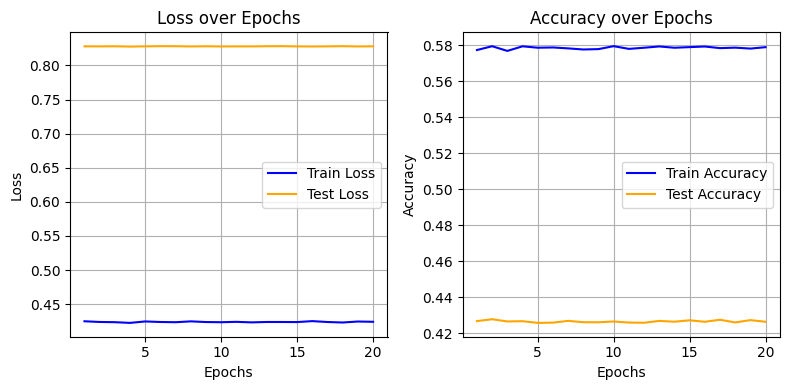

In [ ]:
# Plot train and test loss and accuracy over epochs
plt.figure(figsize=(8, 4))

# Loss plot
plt.subplot(1, 2, 1)
plt.plot(range(1, len(algo.train_loss) + 1), algo.train_loss, linestyle='-', color='b', label='Train Loss')
plt.plot(range(1, len(algo.test_loss) + 1), algo.test_loss, linestyle='-', color='orange', label='Test Loss')
plt.title('Loss over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

# Accuracy plot
plt.subplot(1, 2, 2)
plt.plot(range(1, len(algo.train_accuracy) + 1), algo.train_accuracy, linestyle='-', color='b', label='Train Accuracy')
plt.plot(range(1, len(algo.test_accuracy) + 1), algo.test_accuracy, linestyle='-', color='orange', label='Test Accuracy')
plt.title('Accuracy over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()


One can see the training loss is quite good

# First model: simple user/books embedding
The embedding is the part that creates random values which represent the similarity between users and books (with length of n_user or n_books multiplied by n_factors). It could have been achieved also with nn.Parameter(user_factors), and then creating the random values with randn, however, it seems more common in recommendation system to use the embedding in the creation of the model.

In [ ]:
df_filtered = pd.read_csv("/content/drive/MyDrive/df_for_recommendations_systems_50_to_100_reviews.csv")

In [ ]:
from sklearn.model_selection import train_test_split
train_df, test_df = train_test_split(df_filtered, test_size=0.25)

# Create dictionaries to map user and book IDs to integers
user_to_idx = {user_id: i for i, user_id in enumerate(df_filtered['reviewerID'].unique())}
book_to_idx = {asin: i for i, asin in enumerate(df_filtered['asin'].unique())}

# Convert user and book IDs to integers in the DataFrame
train_df['user_idx'] = train_df['reviewerID'].map(user_to_idx)
train_df['book_idx'] = train_df['asin'].map(book_to_idx)
test_df['user_idx'] = test_df['reviewerID'].map(user_to_idx)
test_df['book_idx'] = test_df['asin'].map(book_to_idx)


In [ ]:
class CFModel(nn.Module):
    def __init__(self, df_filtered, n_factors=5):
        super(CFModel, self).__init__()
        n_users = df_filtered['reviewerID'].nunique()
        n_books = df_filtered['asin'].nunique()
        self.user_factors = nn.Embedding(n_users, n_factors)
        self.books_factors = nn.Embedding(n_books, n_factors)

    def forward(self, user_idx, book_idx):
        user_embed = self.user_factors(user_idx)
        book_embed = self.books_factors(book_idx)
        pred_rating = (user_embed * book_embed).sum(dim=1)
        return pred_rating



We are storing the models with pickle using built-in pytorch saving syntax, after the training process

In [ ]:
from sklearn.metrics import accuracy_score


In [ ]:
user_idx_tensor = torch.LongTensor(train_df['user_idx'].values).to(device)
book_idx_tensor = torch.LongTensor(train_df['book_idx'].values).to(device)
ratings_tensor = torch.FloatTensor(train_df['overall'].values).to(device)
train_dataset = TensorDataset(user_idx_tensor, book_idx_tensor, ratings_tensor)
train_loader = DataLoader(train_dataset, batch_size=1024, shuffle=True)

user_idx_tensor_test = torch.LongTensor(test_df['user_idx'].values).to(device)
book_idx_tensor_test = torch.LongTensor(test_df['book_idx'].values).to(device)
ratings_tensor_test = torch.FloatTensor(test_df['overall'].values).to(device)
test_dataset = TensorDataset(user_idx_tensor_test, book_idx_tensor_test, ratings_tensor_test)
test_loader = DataLoader(test_dataset, batch_size=1024, shuffle=False)

model = CFModel(df_filtered).to(device)

criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)

num_epochs = 30
train_losses = []
test_losses = []
train_accuracies = []
test_accuracies = []

for epoch in range(num_epochs):
    model.train()
    total_train_loss = 0
    total_train_correct = 0

    for user_idx, book_idx, ratings in train_loader:
        optimizer.zero_grad()
        pred_ratings = model(user_idx, book_idx)
        loss = criterion(pred_ratings, ratings)
        loss.backward()
        optimizer.step()
        total_train_loss += loss.item()
        # Assuming ratings are integers, for accuracy calculation
        total_train_correct += accuracy_score(ratings.cpu(), pred_ratings.detach().cpu().round())

    avg_train_loss = total_train_loss / len(train_loader)
    avg_train_accuracy = total_train_correct / len(train_loader)

    train_losses.append(avg_train_loss)
    train_accuracies.append(avg_train_accuracy)

    model.eval()
    with torch.no_grad():
        # Assuming the existence of a test dataset and dataloader named test_loader
        total_test_loss = 0
        total_test_correct = 0
        for user_idx, book_idx, ratings in test_loader:
            pred_ratings = model(user_idx, book_idx)
            loss = criterion(pred_ratings, ratings)
            total_test_loss += loss.item()
            total_test_correct += accuracy_score(ratings.cpu(), pred_ratings.cpu().round())

        avg_test_loss = total_test_loss / len(test_loader)
        avg_test_accuracy = total_test_correct / len(test_loader)

        test_losses.append(avg_test_loss)
        test_accuracies.append(avg_test_accuracy)



In [ ]:
torch.save(model.state_dict(), '/content/drive/MyDrive/models/first_cf_model.pth')
print("Final Training Loss:", train_losses[-1])
print("Final Test Loss:", test_losses[-1])


Final Training Loss: 0.5787760423597439
Final Test Loss: 9.306422344473905


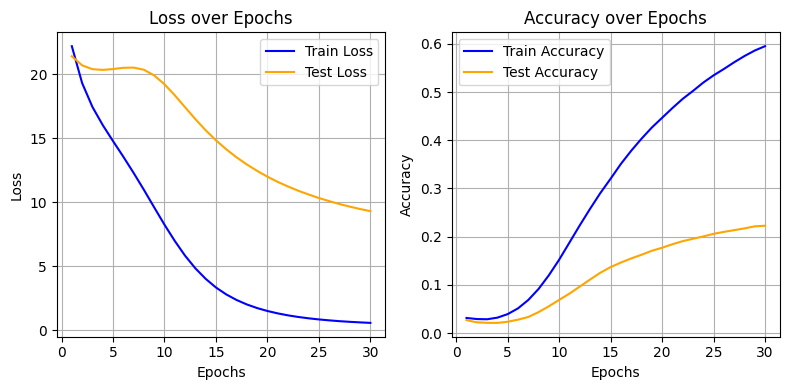

In [ ]:
# Plot the losses and accuracies over epochs
plt.figure(figsize=(8,4))

# Loss plot
plt.subplot(1, 2, 1)
plt.plot(range(1, num_epochs + 1), train_losses, linestyle='-', color='b', label='Train Loss')
plt.plot(range(1, num_epochs + 1), test_losses, linestyle='-', color='orange', label='Test Loss')
plt.title('Loss over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

# Accuracy plot
plt.subplot(1, 2, 2)
plt.plot(range(1, num_epochs + 1), train_accuracies, linestyle='-', color='b', label='Train Accuracy')
plt.plot(range(1, num_epochs + 1), test_accuracies, linestyle='-', color='orange', label='Test Accuracy')
plt.title('Accuracy over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()


At the begining we started with evaluation of the RMSE, however, after a while, we decided to add NDCG since it prioritizes the ranking of recommendations over the absolute accuracy of predicted ratings, which is crucial in scenarios like movie or product suggestions where a precise rating (such as 4.2 vs. 4.5) is less critical than ensuring the most appreciated items top the list. NDCG also emphasizes the relevance of items at the start of the recommendation list, where user engagement is highest, thus enhancing user satisfaction as users typically interact more with these initial recommendations. Additionally, unlike RMSE, NDCG can be applied to data without explicit numerical ratings, handling both binary and graded relevance, making it versatile across various recommendation system types. This focus on user experience aligns closely with business objectives, such as increasing user engagement, satisfaction, and retention, by ensuring the quality of the rankings and prioritizing the most impactful part of the list.

Evantually we ended up with many more metrics so we can evaluate the model performances based on multiple values, hearing the instructor opinion, and also maybe gaining a deeper perspective.

In [ ]:
user_idx_tensor_test = torch.LongTensor(test_df['user_idx'].values).to(device)
book_idx_tensor_test = torch.LongTensor(test_df['book_idx'].values).to(device)
model.eval()
pred_ratings_test = model(user_idx_tensor_test, book_idx_tensor_test).detach().cpu().numpy()
true_ratings = test_df['overall'].values

ndcg = ndcg_score([true_ratings], [pred_ratings_test])

rmse = np.sqrt(mean_squared_error(true_ratings, pred_ratings_test, squared=False))
map_score = calculate_map(true_ratings, pred_ratings_test)

print(f"Metrics:\nNDCG: {ndcg:.4f}\nRMSE: {rmse:.4f}\nMAP: {map_score:.4f}")


Metrics:
NDCG: 0.9861
RMSE: 1.7468
MAP: 0.2155


We decided to store that metrics for later use, so we would be able to compare the models without retraining them.

In [ ]:
save_performance_data('first_cf_model', rmse, ndcg, map_score)


# Second Model

Adding bias

This is done since there are users who rate more positive or negative than others, and there are some books that are plain better or worse than others. We will create number for each user that we can add to our socres and ditto for each book, to handle that.

In [ ]:
n_factors = 5
n_users = df_filtered['reviewerID'].nunique()
n_books = df_filtered['asin'].nunique()

In [ ]:

class CollaborativeFilteringModel(nn.Module):
    def __init__(self, n_users, n_books, n_factors=5, y_range=(0, 5.5)):
        super(CollaborativeFilteringModel, self).__init__()
        self.user_factors = nn.Embedding(n_users, n_factors)
        self.user_bias = nn.Embedding(n_users, 1)
        self.book_factors = nn.Embedding(n_books, n_factors)
        self.book_bias = nn.Embedding(n_books, 1)
        self.y_range = y_range

    def forward(self, user_idx, book_idx):
        user_embed = self.user_factors(user_idx)
        book_embed = self.book_factors(book_idx)
        user_bias = self.user_bias(user_idx)
        book_bias = self.book_bias(book_idx)
        res = (user_embed * book_embed).sum(dim=1, keepdim=True)
        res += user_bias + book_bias
        predicted_rating = torch.sigmoid(res)
        return predicted_rating * (self.y_range[1] - self.y_range[0]) + self.y_range[0]

model = CollaborativeFilteringModel(n_users,n_books, n_factors).to(device)




In [ ]:
user_idx_tensor = torch.LongTensor(train_df['user_idx'].values).to(device)
book_idx_tensor = torch.LongTensor(train_df['book_idx'].values).to(device)
ratings_tensor = torch.FloatTensor(train_df['overall'].values).to(device)

train_dataset = TensorDataset(user_idx_tensor, book_idx_tensor, ratings_tensor)
train_loader = DataLoader(train_dataset, batch_size=1024, shuffle=True)

user_idx_tensor_test = torch.LongTensor(test_df['user_idx'].values).to(device)
book_idx_tensor_test = torch.LongTensor(test_df['book_idx'].values).to(device)
ratings_tensor_test = torch.FloatTensor(test_df['overall'].values).to(device)
test_dataset = TensorDataset(user_idx_tensor_test, book_idx_tensor_test, ratings_tensor_test)
test_loader = DataLoader(test_dataset, batch_size=1024, shuffle=False)


In [ ]:
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)

num_epochs = 30
train_losses = []
test_losses = []
train_accuracies = []
test_accuracies = []

for epoch in range(num_epochs):
    # Training Phase
    model.train()
    total_train_loss = 0
    correct_train_preds = 0
    total_train_preds = 0

    for user_idx, book_idx, ratings in train_loader:
        optimizer.zero_grad()
        pred_ratings = model(user_idx, book_idx).squeeze()

        loss = criterion(pred_ratings, ratings)
        loss.backward()
        optimizer.step()

        total_train_loss += loss.item()

        # Calculate accuracy for train
        predicted_ratings = torch.round(pred_ratings).long()  # Round predictions to the nearest whole number
        correct_train_preds += torch.sum(predicted_ratings == ratings).item()
        total_train_preds += len(ratings)

    avg_train_loss = total_train_loss / len(train_loader)
    avg_train_accuracy = correct_train_preds / total_train_preds
    train_losses.append(avg_train_loss)
    train_accuracies.append(avg_train_accuracy)

    # Testing Phase
    model.eval()
    total_test_loss = 0
    correct_test_preds = 0
    total_test_preds = 0

    with torch.no_grad():
        for user_idx, book_idx, ratings in test_loader:
            pred_ratings = model(user_idx, book_idx).squeeze()
            loss = criterion(pred_ratings, ratings)

            total_test_loss += loss.item()

            # Calculate accuracy for test
            predicted_ratings = torch.round(pred_ratings).long()  # Round predictions to the nearest whole number
            correct_test_preds += torch.sum(predicted_ratings == ratings).item()
            total_test_preds += len(ratings)

    avg_test_loss = total_test_loss / len(test_loader)
    avg_test_accuracy = correct_test_preds / total_test_preds
    test_losses.append(avg_test_loss)
    test_accuracies.append(avg_test_accuracy)





In [ ]:
torch.save(model.state_dict(), '/content/drive/MyDrive/models/cf_with_bias_model.pth')

In [ ]:
print("last loss is ", test_losses[-1])

last loss is  1.9252845908320226


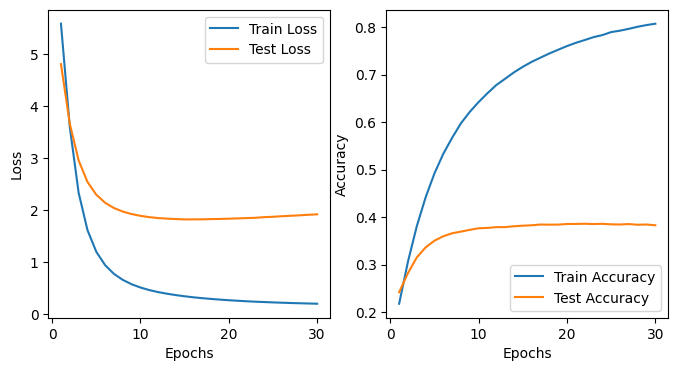

In [ ]:
# Plotting
epochs = range(1, num_epochs + 1)

plt.figure(figsize=(8, 4))

plt.subplot(1, 2, 1)
plt.plot(epochs, train_losses, label='Train Loss')
plt.plot(epochs, test_losses, label='Test Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(epochs, train_accuracies, label='Train Accuracy')
plt.plot(epochs, test_accuracies, label='Test Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

In [ ]:

user_idx_tensor_test = torch.LongTensor(test_df['user_idx'].values).to(device)
book_idx_tensor_test = torch.LongTensor(test_df['book_idx'].values).to(device)
model.eval()
pred_ratings_test = model(user_idx_tensor_test, book_idx_tensor_test).detach().cpu().numpy()
true_ratings = test_df['overall'].values
true_ratings, pred_ratings_test =  true_ratings.reshape(-1), pred_ratings_test.reshape(-1)

ndcg = ndcg_score([true_ratings], [pred_ratings_test])


rmse = np.sqrt(mean_squared_error(true_ratings, pred_ratings_test, squared=False))

map_score = calculate_map(true_ratings, pred_ratings_test)



print(f"Metrics:\nNDCG: {ndcg:.4f}\nRMSE: {rmse:.4f}\nMAP: {map_score:.4f}")

save_performance_data('cf_with_bias_model', rmse, ndcg, map_score)


Metrics:
NDCG: 0.9867
RMSE: 1.1779
MAP: 0.2190


### Third Model - Regularization:
In order to prevent overfitting, we would now create another model that uses regularization

In [ ]:
model_with_regularization = CollaborativeFilteringModel(n_users,n_books, n_factors).to(device)

criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model_with_regularization.parameters(), lr=0.01, weight_decay=0.01)
# Added L2 regularization with weight_decay



In [ ]:
user_idx_tensor = torch.LongTensor(train_df['user_idx'].values).to(device)
book_idx_tensor = torch.LongTensor(train_df['book_idx'].values).to(device)
ratings_tensor = torch.FloatTensor(train_df['overall'].values).to(device)

train_dataset = TensorDataset(user_idx_tensor, book_idx_tensor, ratings_tensor)
train_loader = DataLoader(train_dataset, batch_size=1024, shuffle=True)

user_idx_tensor_test = torch.LongTensor(test_df['user_idx'].values).to(device)
book_idx_tensor_test = torch.LongTensor(test_df['book_idx'].values).to(device)
ratings_tensor_test = torch.FloatTensor(test_df['overall'].values).to(device)

test_dataset = TensorDataset(user_idx_tensor_test, book_idx_tensor_test, ratings_tensor_test)
test_loader = DataLoader(test_dataset, batch_size=1024, shuffle=False)

In [ ]:
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)

num_epochs = 30
train_losses = []
test_losses = []
train_accuracies = []
test_accuracies = []

for epoch in range(num_epochs):
    # Training Phase
    model.train()
    total_train_loss = 0
    correct_train_preds = 0
    total_train_preds = 0

    for user_idx, book_idx, ratings in train_loader:
        optimizer.zero_grad()
        pred_ratings = model(user_idx, book_idx).squeeze()

        loss = criterion(pred_ratings, ratings)
        loss.backward()
        optimizer.step()

        total_train_loss += loss.item()

        # Calculate accuracy for train
        predicted_ratings = torch.round(pred_ratings).long()  # Round predictions to the nearest whole number
        correct_train_preds += torch.sum(predicted_ratings == ratings).item()
        total_train_preds += len(ratings)

    avg_train_loss = total_train_loss / len(train_loader)
    avg_train_accuracy = correct_train_preds / total_train_preds
    train_losses.append(avg_train_loss)
    train_accuracies.append(avg_train_accuracy)

    # Testing Phase
    model.eval()
    total_test_loss = 0
    correct_test_preds = 0
    total_test_preds = 0

    with torch.no_grad():
        for user_idx, book_idx, ratings in test_loader:
            pred_ratings = model(user_idx, book_idx).squeeze()
            loss = criterion(pred_ratings, ratings)

            total_test_loss += loss.item()

            # Calculate accuracy for test
            predicted_ratings = torch.round(pred_ratings).long()  # Round predictions to the nearest whole number
            correct_test_preds += torch.sum(predicted_ratings == ratings).item()
            total_test_preds += len(ratings)

    avg_test_loss = total_test_loss / len(test_loader)
    avg_test_accuracy = correct_test_preds / total_test_preds
    test_losses.append(avg_test_loss)
    test_accuracies.append(avg_test_accuracy)


In [ ]:
torch.save(model_with_regularization.state_dict(), '/content/drive/MyDrive/models/cf_with_bias_and_regularization_model.pth')

In [ ]:
print("last loss is ", test_losses[-1])

last loss is  2.126861954844275


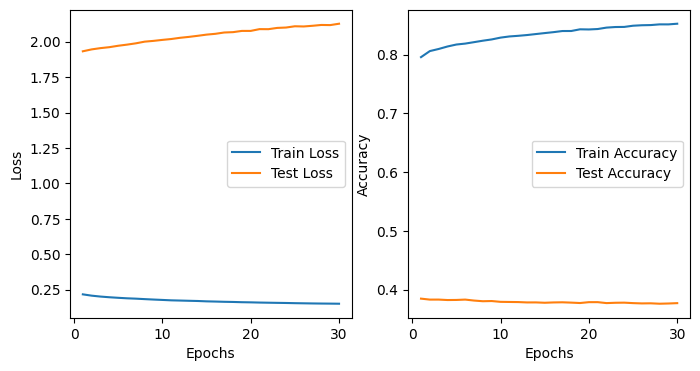

In [ ]:
# Plotting
epochs = range(1, num_epochs + 1)

plt.figure(figsize=(8, 4))

plt.subplot(1, 2, 1)
plt.plot(epochs, train_losses, label='Train Loss')
plt.plot(epochs, test_losses, label='Test Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(epochs, train_accuracies, label='Train Accuracy')
plt.plot(epochs, test_accuracies, label='Test Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

In [ ]:

user_idx_tensor_test = torch.LongTensor(test_df['user_idx'].values).to(device)
book_idx_tensor_test = torch.LongTensor(test_df['book_idx'].values).to(device)
model.eval()
pred_ratings_test = model(user_idx_tensor_test, book_idx_tensor_test).detach().cpu().numpy()
true_ratings = test_df['overall'].values
true_ratings, pred_ratings_test =  true_ratings.reshape(-1), pred_ratings_test.reshape(-1)

ndcg = ndcg_score([true_ratings], [pred_ratings_test])

rmse = np.sqrt(mean_squared_error(true_ratings, pred_ratings_test, squared=False))

map_score = calculate_map(true_ratings, pred_ratings_test)

print(f"Metrics:\nNDCG: {ndcg:.4f}\nRMSE: {rmse:.4f}\nMAP: {map_score:.4f}")
save_performance_data('cf_with_bias_and_regularization_model', rmse, ndcg, map_score)




Metrics:
NDCG: 0.9858
RMSE: 1.2077
MAP: 0.2175


Let's see if we can get recommendation based on our models so far (future work will include to change the recommended books numbers to actually boooks):

In [ ]:

all_users = train_df['user_idx'].unique()
all_books = train_df['book_idx'].unique()

recommendations = []

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model.to(device)

# Collect recommendations
with torch.no_grad():
    for user in all_users:
        user_idx_tensor = torch.LongTensor([user] * len(all_books)).to(device)
        book_idx_tensor = torch.LongTensor(all_books).to(device)
        pred_ratings = model(user_idx_tensor, book_idx_tensor).squeeze()
        top_books_idx = torch.argsort(pred_ratings, descending=True)[:10].cpu()  # Move to CPU
        top_books = all_books[top_books_idx]
        recommendations.extend(top_books.tolist())  # Collect all recommended books

# Count occurrences of each book
book_counts = pd.Series(recommendations).value_counts()

# Get top recommended books and their counts
top_books = book_counts.head(10)
top_books_idx = top_books.index.tolist()

# Print top recommended books with counts
print("Top Recommended Books:")
for book_idx in top_books_idx:
    print(f"Book ID: {book_idx}, Count: {top_books[book_idx]}")




Top Recommended Books:
Book ID: 32709, Count: 2278
Book ID: 3899, Count: 2165
Book ID: 10108, Count: 1950
Book ID: 26654, Count: 1944
Book ID: 17619, Count: 1856
Book ID: 30796, Count: 1618
Book ID: 11017, Count: 1596
Book ID: 31574, Count: 1542
Book ID: 30232, Count: 1323
Book ID: 25999, Count: 1301


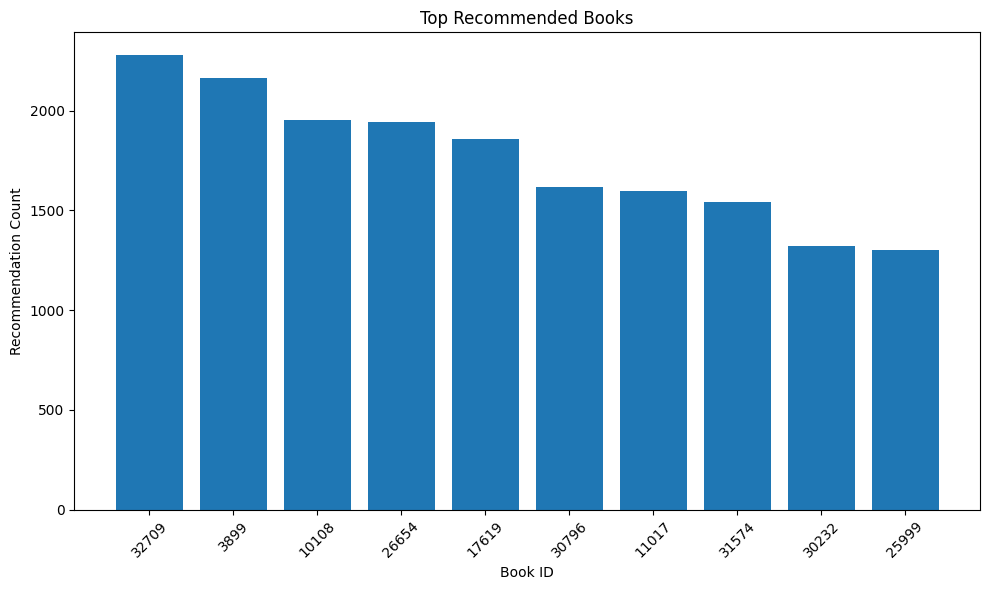

In [ ]:
plt.figure(figsize=(10, 6))
plt.bar(top_books.index.astype(str), top_books.values)
plt.xlabel('Book ID')
plt.ylabel('Recommendation Count')
plt.title('Top Recommended Books')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Category NN

In [ ]:
from sklearn.model_selection import train_test_split


In [ ]:
asin_file=f"/content/drive/MyDrive/asin_to_category.parquet"
asin_to_category = pd.read_parquet(asin_file)

In [ ]:
result_df = df_filtered.merge(asin_to_category, on='asin', how='left')

In [ ]:
train_df, test_df = train_test_split(result_df, test_size=0.25)

user_to_idx = {user_id: i for i, user_id in enumerate(result_df['reviewerID'].unique())}
book_to_idx = {asin: i for i, asin in enumerate(result_df['asin'].unique())}


In [ ]:
category_to_idx = {}
categories = result_df['extracted_category'].unique()
categories_series = pd.Series(categories)

# Drop "unknown" category
categories = categories_series[categories_series != "unknown"].to_numpy()

for i, category in enumerate(categories):
        category_to_idx[category] = i

# Add the special index for unknown categories
category_to_idx['unknown'] = i+1

In [ ]:
train_df['user_idx'] = train_df['reviewerID'].map(user_to_idx)
train_df['book_idx'] = train_df['asin'].map(book_to_idx)
train_df['category_idx'] = train_df['extracted_category'].map(category_to_idx)
test_df['user_idx'] = test_df['reviewerID'].map(user_to_idx)
test_df['book_idx'] = test_df['asin'].map(book_to_idx)
test_df['category_idx'] = test_df['extracted_category'].map(category_to_idx)

In [ ]:
from torch.utils.data import TensorDataset, DataLoader

# Create TensorDatasets and DataLoaders
train_dataset = TensorDataset(
    torch.LongTensor(train_df['user_idx'].values),
    torch.LongTensor(train_df['book_idx'].values),
    torch.LongTensor(train_df['category_idx'].values),
    torch.FloatTensor(train_df['overall'].values)
)
train_loader = DataLoader(train_dataset, batch_size=1024, shuffle=True)

test_dataset = TensorDataset(
    torch.LongTensor(test_df['user_idx'].values),
    torch.LongTensor(test_df['book_idx'].values),
    torch.LongTensor(test_df['category_idx'].values),
    torch.FloatTensor(test_df['overall'].values)
)
test_loader = DataLoader(test_dataset, batch_size=1024, shuffle=False)

In [ ]:
import torch
import torch.nn as nn
from sklearn.metrics import mean_squared_error

In [ ]:
class CollaborativeFilteringModel(nn.Module):
    def __init__(self, result_df, n_factors=5, y_range=(0, 5.5)):
        super(CollaborativeFilteringModel, self).__init__()
        n_users, n_books, n_categories = result_df['reviewerID'].nunique(), result_df['asin'].nunique(), result_df['extracted_category'].nunique()
        self.n_categories = n_categories
        self.user_factors = nn.Embedding(n_users, n_factors)
        self.user_bias = nn.Embedding(n_users, 1)
        self.book_factors = nn.Embedding(n_books, n_factors)
        self.book_bias = nn.Embedding(n_books, 1)
        self.category_factors = nn.Embedding(n_categories, n_factors)
        self.y_range = y_range

    def forward(self, user_idx, book_idx, category_idx):
        user_embed = self.user_factors(user_idx)
        book_embed = self.book_factors(book_idx)
        # Handle unknown categories by using a neutral vector
        category_embed = self.category_factors(category_idx)
        unknown_category_mask = category_idx == (self.n_categories - 1)
        category_embed = torch.where(unknown_category_mask.unsqueeze(1), torch.zeros_like(category_embed), category_embed)


        user_bias = self.user_bias(user_idx)
        book_bias = self.book_bias(book_idx)

        res = (user_embed * book_embed * category_embed).sum(dim=1, keepdim=True)
        res += user_bias + book_bias
        predicted_rating = torch.sigmoid(res)
        return predicted_rating * (self.y_range[1] - self.y_range[0]) + self.y_range[0]






In [ ]:
n_categories = 33
model = CollaborativeFilteringModel(result_df).to(device)
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.01, weight_decay=0.01)


In [ ]:
user_idx_tensor = torch.LongTensor(train_df['user_idx'].values).to(device)
book_idx_tensor = torch.LongTensor(train_df['book_idx'].values).to(device)
ratings_tensor = torch.FloatTensor(train_df['overall'].values).to(device)
category_idx_tensor = torch.LongTensor(train_df['category_idx'].values).to(device)

train_dataset = TensorDataset(user_idx_tensor, book_idx_tensor, ratings_tensor, category_idx_tensor)
train_loader = DataLoader(train_dataset, batch_size=1024, shuffle=True)

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt

criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.01)

num_epochs = 30
train_losses = []
test_losses = []
train_accuracies = []
test_accuracies = []

for epoch in range(num_epochs):
    # Training Phase
    model.train()
    total_train_loss = 0
    correct_train_preds = 0
    total_train_preds = 0

    for user_idx_batch, book_idx_batch, ratings_batch, category_idx_batch in train_loader:
        user_idx_batch = user_idx_batch.long()
        book_idx_batch = book_idx_batch.long()
        category_idx_batch = category_idx_batch.long()

        optimizer.zero_grad()
        pred_ratings = model(user_idx_batch, book_idx_batch, category_idx_batch).squeeze()
        loss = criterion(pred_ratings, ratings_batch)
        loss.backward()
        optimizer.step()
        total_train_loss += loss.item()

        # Calculate accuracy for train
        predicted_ratings = torch.round(pred_ratings).long()  # Round predictions to the nearest whole number
        correct_train_preds += torch.sum(predicted_ratings == ratings_batch).item()
        total_train_preds += len(ratings_batch)

    avg_train_loss = total_train_loss / len(train_loader)
    avg_train_accuracy = correct_train_preds / total_train_preds
    train_losses.append(avg_train_loss)
    train_accuracies.append(avg_train_accuracy)

    # Testing Phase
    model.eval()
    total_test_loss = 0
    correct_test_preds = 0
    total_test_preds = 0

    with torch.no_grad():
        for user_idx_batch, book_idx_batch, ratings_batch, category_idx_batch in test_loader:
            user_idx_batch = user_idx_batch.long()
            book_idx_batch = book_idx_batch.long()
            category_idx_batch = category_idx_batch.long()
            pred_ratings = model(user_idx_batch, book_idx_batch, category_idx_batch).squeeze()
            loss = criterion(pred_ratings, ratings_batch)
            total_test_loss += loss.item()

            # Calculate accuracy for test
            predicted_ratings = torch.round(pred_ratings).long()  # Round predictions to the nearest whole number
            correct_test_preds += torch.sum(predicted_ratings == ratings_batch).item()
            total_test_preds += len(ratings_batch)

    avg_test_loss = total_test_loss / len(test_loader)
    avg_test_accuracy = correct_test_preds / total_test_preds
    test_losses.append(avg_test_loss)
    test_accuracies.append(avg_test_accuracy)



# Save the model
torch.save(model.state_dict(), '/content/drive/MyDrive/models/fc_with_category.pth')


In [ ]:
print("last loss is ",test_losses[-1])

last loss is  130.49311083416606


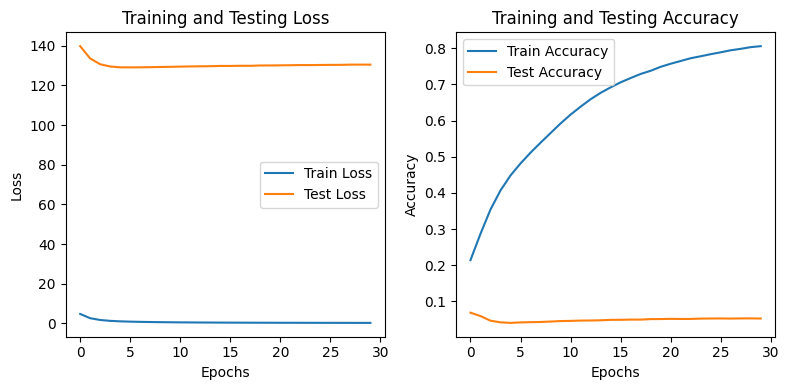

In [ ]:
# Plotting
plt.figure(figsize=(8, 4))

plt.subplot(1, 2, 1)
plt.plot(range(num_epochs), train_losses, label='Train Loss')
plt.plot(range(num_epochs), test_losses, label='Test Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Training and Testing Loss')

plt.subplot(1, 2, 2)
plt.plot(range(num_epochs), train_accuracies, label='Train Accuracy')
plt.plot(range(num_epochs), test_accuracies, label='Test Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training and Testing Accuracy')

plt.tight_layout()
plt.show()

In [ ]:

user_idx_tensor_test = torch.LongTensor(test_df['user_idx'].values).to(device)

book_idx_tensor_test = torch.LongTensor(test_df['book_idx'].values).to(device)
category_idx_tensor = torch.LongTensor(test_df['category_idx'].values).to(device)

model.eval()
with torch.no_grad():
    pred_ratings_test = model(user_idx_tensor_test, book_idx_tensor_test, category_idx_tensor).squeeze().cpu().numpy()
true_ratings = test_df['overall'].values
true_ratings, pred_ratings_test =  true_ratings.reshape(-1), pred_ratings_test.reshape(-1)

ndcg = ndcg_score([true_ratings], [pred_ratings_test])


rmse = np.sqrt(mean_squared_error(true_ratings, pred_ratings_test, squared=False))

map_score = calculate_map(true_ratings, pred_ratings_test)

print(f"Metrics:\nNDCG: {ndcg:.4f}\nRMSE: {rmse:.4f}\nMAP: {map_score:.4f}")

save_performance_data('cf_with_category', rmse, ndcg, map_score)




Metrics:
NDCG: 0.9874
RMSE: 1.1357
MAP: 0.2203


## BOW Model

This model would utilize the BOW we have extracted earlier, in order to see if it improves the prediction.

In [ ]:
df_for_bow=pd.read_csv("/content/drive/MyDrive/bow_df.csv")

Preparing the df

In [ ]:
result_df=pd.concat([df_filtered,df_for_bow],axis=1)

In [ ]:
columns_to_drop = ['Unnamed: 0', '__index_level_0__','reviewText','summary','verified','style']

result_df.drop(columns_to_drop, axis=1, inplace=True)


In [ ]:
result_df.head(2)

overall      reviewerID        asin  author  best  bit  book  books  \
0        5  A3H9YD6K9TVKDP  0001713353       0     0    0     1      0   
1        5  A3QYDL5CDNYN66  0001061240       0     0    0     1      0   

   character  characters  ...  think  time  want  war  way  work  world  \
0          0           0  ...      0     0     0    0    0     0      0   
1          0           0  ...      1     0     0    0    0     0      0   

   writing  written  years  
0        0        0      0  
1        0        0      1  

[2 rows x 53 columns]

Creating the recommendation system for bow

In [ ]:
import torch
import torch.nn as nn
from torch.utils.data import DataLoader, TensorDataset
import torch.optim as optim

# Define the extended model
class ExtendedCollaborativeFilteringModel(nn.Module):
    def __init__(self, n_users, n_books, n_factors=5, n_bow_features=50, y_range=(0, 5.5)):
        super(ExtendedCollaborativeFilteringModel, self).__init__()
        self.user_factors = nn.Embedding(n_users, n_factors)
        self.user_bias = nn.Embedding(n_users, 1)
        self.book_factors = nn.Embedding(n_books, n_factors)

        self.book_bias = nn.Embedding(n_books, 1)
        self.bow_layer = nn.Linear(n_bow_features, 1)
        self.y_range = y_range

    def forward(self, user_idx, book_idx, bow_features):
        user_embed = self.user_factors(user_idx)
        book_embed = self.book_factors(book_idx)
        user_bias = self.user_bias(user_idx)
        book_bias = self.book_bias(book_idx)
        bow_output = self.bow_layer(bow_features)

        res = (user_embed * book_embed).sum(dim=1, keepdim=True)
        res += user_bias + book_bias + bow_output
        predicted_rating = torch.sigmoid(res)
        return predicted_rating * (self.y_range[1] - self.y_range[0]) + self.y_range[0]




In [ ]:
# train test
from sklearn.model_selection import train_test_split
train_df, test_df = train_test_split(result_df, test_size=0.25)

# Create dictionaries to map user and book IDs to integers
user_to_idx = {user_id: i for i, user_id in enumerate(result_df['reviewerID'].unique())}
book_to_idx = {asin: i for i, asin in enumerate(result_df['asin'].unique())}

# Convert user and book IDs to integers in the DataFrame
train_df['user_idx'] = train_df['reviewerID'].map(user_to_idx)
train_df['book_idx'] = train_df['asin'].map(book_to_idx)
test_df['user_idx'] = test_df['reviewerID'].map(user_to_idx)
test_df['book_idx'] = test_df['asin'].map(book_to_idx)


In [ ]:
# Assuming `result_df` is your DataFrame with BoW features and other information
n_factors = 5
n_users = result_df['reviewerID'].nunique()
n_books = result_df['asin'].nunique()
n_bow_features = result_df.shape[1] - 3  # Subtracting 'overall', 'reviewerID', 'asin'

model = ExtendedCollaborativeFilteringModel(n_users, n_books, n_factors, n_bow_features).to(device)

# Prepare training data
user_idx_tensor = torch.LongTensor(train_df['user_idx'].values).to(device)
book_idx_tensor = torch.LongTensor(train_df['book_idx'].values).to(device)
ratings_tensor = torch.FloatTensor(train_df['overall'].values).to(device)

bow_features_tensor = torch.FloatTensor(train_df.drop(columns=['overall', 'reviewerID', 'asin', "user_idx", "book_idx"]).values).to(device)

train_dataset = TensorDataset(user_idx_tensor, book_idx_tensor, bow_features_tensor, ratings_tensor)
train_loader = DataLoader(train_dataset, batch_size=1024, shuffle=True)

# Prepare test data
user_idx_tensor_test = torch.LongTensor(test_df['user_idx'].values).to(device)
book_idx_tensor_test = torch.LongTensor(test_df['book_idx'].values).to(device)
ratings_tensor_test = torch.FloatTensor(test_df['overall'].values).to(device)
bow_features_tensor_test = torch.FloatTensor(test_df.drop(columns=['overall', 'reviewerID', 'asin', "user_idx", "book_idx"]).values).to(device)

test_dataset = TensorDataset(user_idx_tensor_test, book_idx_tensor_test, bow_features_tensor_test, ratings_tensor_test)
test_loader = DataLoader(test_dataset, batch_size=1024, shuffle=False)


In [ ]:

criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)

num_epochs = 30
train_losses = []
test_losses = []
train_accuracies = []
test_accuracies = []

for epoch in range(num_epochs):
    # Training Phase
    model.train()
    total_train_loss = 0
    correct_train_preds = 0
    total_train_preds = 0

    for user_idx, book_idx, bow_features, ratings in train_loader:
        optimizer.zero_grad()
        pred_ratings = model(user_idx, book_idx, bow_features).squeeze()

        loss = criterion(pred_ratings, ratings)
        loss.backward()
        optimizer.step()

        total_train_loss += loss.item()

        # Calculate accuracy for train
        predicted_ratings = torch.round(pred_ratings).long()  # Round predictions to the nearest whole number
        correct_train_preds += torch.sum(predicted_ratings == ratings).item()
        total_train_preds += len(ratings)

    avg_train_loss = total_train_loss / len(train_loader)
    avg_train_accuracy = correct_train_preds / total_train_preds
    train_losses.append(avg_train_loss)
    train_accuracies.append(avg_train_accuracy)

    # Testing Phase
    model.eval()
    total_test_loss = 0
    correct_test_preds = 0
    total_test_preds = 0

    with torch.no_grad():
        for user_idx, book_idx, bow_features, ratings in test_loader:
            pred_ratings = model(user_idx, book_idx, bow_features).squeeze()
            loss = criterion(pred_ratings, ratings)

            total_test_loss += loss.item()

            # Calculate accuracy for test
            predicted_ratings = torch.round(pred_ratings).long()  # Round predictions to the nearest whole number
            correct_test_preds += torch.sum(predicted_ratings == ratings).item()
            total_test_preds += len(ratings)

    avg_test_loss = total_test_loss / len(test_loader)
    avg_test_accuracy = correct_test_preds / total_test_preds
    test_losses.append(avg_test_loss)
    test_accuracies.append(avg_test_accuracy)

In [ ]:
import numpy as np

# Calculate metrics
true_ratings = np.array(test_df['overall'].values)
pred_ratings = []

model.eval()
with torch.no_grad():
    for user_idx, book_idx, bow_features, ratings in test_loader:
        pred_ratings_batch = model(user_idx, book_idx, bow_features).squeeze().cpu().numpy()
        pred_ratings.extend(pred_ratings_batch)

pred_ratings = np.array(pred_ratings)

ndcg = ndcg_score([true_ratings], [pred_ratings])
rmse = mean_squared_error(true_ratings, pred_ratings, squared=False)
map_score = calculate_map(true_ratings, pred_ratings)

print(f"Metrics:\nNDCG: {ndcg:.4f}\nRMSE: {rmse:.4f}\nMAP: {map_score:.4f}")

save_performance_data('cf_bow_model', rmse, ndcg, map_score)


Metrics:
NDCG: 0.9879
RMSE: 1.2914
MAP: 0.2203


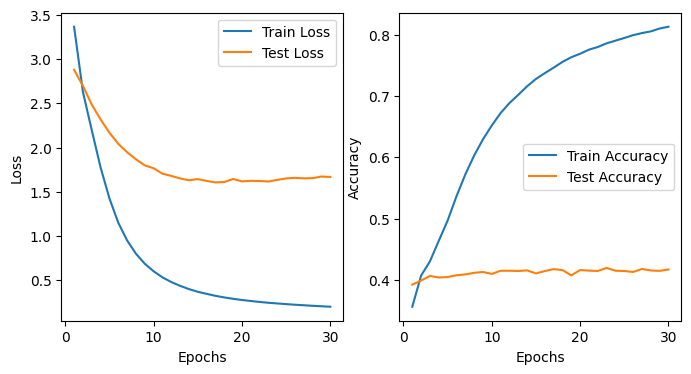

In [ ]:
# Plotting
epochs = range(1, num_epochs + 1)

plt.figure(figsize=(8, 4))

plt.subplot(1, 2, 1)
plt.plot(epochs, train_losses, label='Train Loss')
plt.plot(epochs, test_losses, label='Test Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(epochs, train_accuracies, label='Train Accuracy')
plt.plot(epochs, test_accuracies, label='Test Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

# Evaluating Feature Importance using SHAP Values

SHAP summary plot provides a comprehensive visualization of feature importance and their impact on the model's predictions. In the context of our work, we want to see what words will influence most on the prediction of the rating/recommendation of each user, as they are our features.

In [ ]:
import shap

class WrappedModel:
    def __init__(self, model):
        self.model = model

    def predict(self, data):
        self.model.eval()
        with torch.no_grad():
            user_idx = torch.LongTensor(data[:, 0].astype(np.int64)).to(device)
            book_idx = torch.LongTensor(data[:, 1].astype(np.int64)).to(device)
            bow_features = torch.FloatTensor(data[:, 2:].astype(np.float32)).to(device)
            return self.model(user_idx, book_idx, bow_features).cpu().numpy()

PermutationExplainer explainer: 43805it [14:29, 50.14it/s]


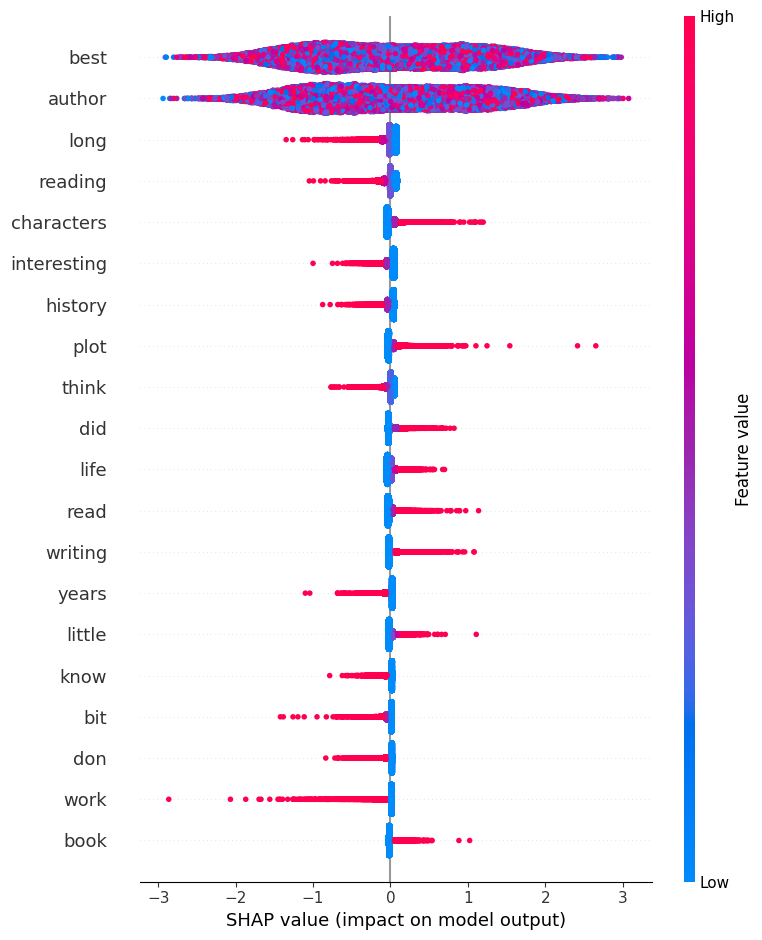

In [ ]:

test_data = np.hstack((
    test_df[['user_idx', 'book_idx']].values,
    bow_features_tensor_test.cpu().numpy()
))

wrapped_model = WrappedModel(model)

explainer = shap.Explainer(wrapped_model.predict, test_data)
shap_values = explainer(test_data)

feature_names = test_df.drop(columns=['overall', 'reviewerID', 'asin', 'user_idx', 'book_idx']).columns.tolist()

shap.summary_plot(shap_values, test_data, feature_names=feature_names)


The visualization above shows how the top textual features impact the model's output for book reviews. From the top features, we observe significant influence from the words "best" and "author," indicating their strong association with the review sentiment.

*"Best" and "Author": These features have a substantial impact on predictions, with high values contributing positively and low values contributing negatively. This suggests that mentions of "best" and "author" are closely tied to either highly positive or highly negative reviews.

*"Long" and "Interesting": These features tend to negatively impact the predictions. This might indicate that reviews mentioning the book's length or its level of interest are often critical.

*"Plot," "Characters," and "Read": These features positively influence the model's output, reflecting that positive mentions of the plot, characters, or the reading experience are associated with favorable reviews.

*"History": This feature shows a negative correlation with predictions, suggesting that historical context or books categorized under history might lead to lower satisfaction.

If we consider the broader context of book reviews, this makes sense. Features like "best" and "author" directly reflect the reader's overall impression, while aspects like "plot" and "characters" are fundamental to a book's appeal. Conversely, comments on the book's length or interest level often highlight dissatisfaction. Understanding these patterns helps us grasp the critical factors influencing reader satisfaction and the model's decision-making process.

## TF-IDF Model

## PCA Model

## SBert Model

## Sentiment Model

Next we want to generate a senitment based on our features "reviewText", and "summary", working with already made models

We kept the summary and review text for a long time, however, we can't extract really important data from the review text rather the sentiment, so it seems like the right time to drop them. In addition, we first thought that we would use the feature "verified: True/False" but this also seems meaningless, so we would drop that as well.

In [ ]:
!pip install transformers


In [ ]:
result_df

Unnamed: 0  overall  verified      reviewerID        asin  \
0               15        5     False  A3H9YD6K9TVKDP  0001713353   
1               47        5     False  A3QYDL5CDNYN66  0001061240   
2               72        5     False  A1BNWEJ7RVPLQ1  0001712799   
3               98        4     False  A3CKPNSGA7JOLK  0001712799   
4              106        5     False  A2MOBMVHECYVLE  0002006448   
...            ...      ...       ...             ...         ...   
175209     7008466        5     False  A35Y7MFHCMQSEO  0316364061   
175210     7008601        4      True  A3EBCNHNQIP2Z3  0316403784   
175211     7008602        5     False  A2ADZVJ87N36N4  0316403784   
175212     7008603        3      True  A2C4MKATLLGFB0  0316403784   
175213     7008621        1      True   AML1XEB5E7FX9  0316403784   

                                 style  \
0            {'Format:': ' Hardcover'}   
1            {'Format:': ' Hardcover'}   
2            {'Format:': ' Hardcover'}   
3            {'Format:': ' Hardcover'}   
4            {'Format:': ' Hardcover'}   
...                                ...   
175209  {'Format:': ' Kindle Edition'}   
175210  {'Format:': ' Kindle Edition'}   
175211  {'Format:': ' Kindle Edition'}   
175212  {'Format:': ' Kindle Edition'}   
175213  {'Format:': ' Kindle Edition'}   

                                               reviewText  \
0       Over and over the king has problems.  Fortunat...   
1       This was a favorite. I think it changed my lif...   
2       In this early reader, Dr. Seuss explores the c...   
3       Dr. Suess's scansion and made-up words annoy m...   
4       Christopher Kremmer's book takes you on a jour...   
...                                                   ...   
175209  Order of the Unicorn is book four in an awesom...   
175210  This is a fantastic read, until the ending. It...   
175211  I'll be damned. I never expected a noir novel ...   
175212  Pop. 1280 is about a sheriff in the Town of Po...   
175213  At first I thought the characters were a littl...   

                                               summary  __index_level_0__  \
0                                        Not Nice Mice                 15   
1                                      Changed my life                 47   
2                  Two thumbs up for this early reader                 72   
3       A fine first read with wonderful illustrations                 98   
4                                    A compelling read                106   
...                                                ...                ...   
175209               A dangerous and exciting mission!            3360856   
175210              Funny, Twisted Southern-Fried Noir            3360991   
175211                              One of JT's bests.            3360992   
175212                     Not as good as I had hoped.            3360993   
175213                                            Dumb            3361011   

                  extracted_category  
0                   Children's Books  
1                   Children's Books  
2                   Children's Books  
3                   Children's Books  
4                             Travel  
...                              ...  
175209              Children's Books  
175210  Mystery, Thriller & Suspense  
175211  Mystery, Thriller & Suspense  
175212  Mystery, Thriller & Suspense  
175213  Mystery, Thriller & Suspense  

[175214 rows x 10 columns]

From here on we would use the sentiment in our model


In [ ]:
sentiment_path=f"/content/drive/MyDrive/books_to_kindle_and_books_parquets/books/combined_books_1_with_sentiment.parquet"

In [ ]:
result_df = pd.read_parquet(sentiment_path)

In [ ]:
result_df.head()

overall      reviewerID        asin                      style  \
0        5  A3H9YD6K9TVKDP  0001713353  {'Format:': ' Hardcover'}   
1        5  A3QYDL5CDNYN66  0001061240  {'Format:': ' Hardcover'}   
2        5  A1BNWEJ7RVPLQ1  0001712799  {'Format:': ' Hardcover'}   
3        4  A3CKPNSGA7JOLK  0001712799  {'Format:': ' Hardcover'}   
4        5  A2MOBMVHECYVLE  0002006448  {'Format:': ' Hardcover'}   

   __index_level_0__ extracted_category  sentiment_category  
0                 15   Children's Books                   0  
1                 47   Children's Books                   3  
2                 72   Children's Books                   3  
3                 98   Children's Books                   3  
4                106             Travel                   3

In [ ]:
class SentimentModel(nn.Module):
    def __init__(self, n_users, n_books, n_categories, n_sentiments=4, n_factors=5, y_range=(0, 5.5)):
        super(SentimentModel, self).__init__()
        self.n_categories = n_categories
        self.user_factors = nn.Embedding(n_users, n_factors)
        self.user_bias = nn.Embedding(n_users, 1)
        self.book_factors = nn.Embedding(n_books, n_factors)
        self.book_bias = nn.Embedding(n_books, 1)
        self.category_factors = nn.Embedding(n_categories, n_factors)
        self.sentiment_factors = nn.Embedding(n_sentiments, n_factors)
        self.y_range = y_range

    def forward(self, user_idx, book_idx, category_idx, sentiment_idx):
        user_embed = self.user_factors(user_idx)
        book_embed = self.book_factors(book_idx)
        category_embed = self.category_factors(category_idx)
        sentiment_embed = self.sentiment_factors(sentiment_idx)

        unknown_category_mask = category_idx == (self.n_categories - 1)
        category_embed = torch.where(unknown_category_mask.unsqueeze(1), torch.zeros_like(category_embed), category_embed)

        user_bias = self.user_bias(user_idx)
        book_bias = self.book_bias(book_idx)

        res = (user_embed * book_embed * category_embed * sentiment_embed).sum(dim=1, keepdim=True)
        res += user_bias + book_bias
        predicted_rating = torch.sigmoid(res)
        return predicted_rating * (self.y_range[1] - self.y_range[0]) + self.y_range[0]


In [ ]:
train_df, test_df = train_test_split(result_df, test_size=0.25)

# Create dictionaries to map user and book IDs to integers
user_to_idx = {user_id: i for i, user_id in enumerate(result_df['reviewerID'].unique())}
book_to_idx = {asin: i for i, asin in enumerate(result_df['asin'].unique())}
category_to_idx = {}
categories = result_df['extracted_category'].unique()
categories_series = pd.Series(categories)

# Drop "unknown" category
categories = categories_series[categories_series != "unknown"].to_numpy()

for i, category in enumerate(categories):
    category_to_idx[category] = i

# Add the special index for unknown categories
category_to_idx['unknown'] = i + 1

In [ ]:
train_df['user_idx'] = train_df['reviewerID'].map(user_to_idx)
train_df['book_idx'] = train_df['asin'].map(book_to_idx)
train_df['category_idx'] = train_df['extracted_category'].map(category_to_idx)
test_df['user_idx'] = test_df['reviewerID'].map(user_to_idx)
test_df['book_idx'] = test_df['asin'].map(book_to_idx)
test_df['category_idx'] = test_df['extracted_category'].map(category_to_idx)


In [ ]:
train_dataset = TensorDataset(
    torch.LongTensor(train_df['user_idx'].values),
    torch.LongTensor(train_df['book_idx'].values),
    torch.LongTensor(train_df['category_idx'].values),
    torch.LongTensor(train_df['sentiment_category'].values),
    torch.FloatTensor(train_df['overall'].values)
)
train_loader = DataLoader(train_dataset, batch_size=1024, shuffle=True)

test_dataset = TensorDataset(
    torch.LongTensor(test_df['user_idx'].values),
    torch.LongTensor(test_df['book_idx'].values),
    torch.LongTensor(test_df['category_idx'].values),
    torch.LongTensor(test_df['sentiment_category'].values),
    torch.FloatTensor(test_df['overall'].values)
)
test_loader = DataLoader(test_dataset, batch_size=1024, shuffle=False)

In [ ]:
n_users = result_df['reviewerID'].nunique()
n_books = result_df['asin'].nunique()
n_categories = result_df['extracted_category'].nunique()
n_sentiments = 4

In [ ]:
model = SentimentModel(n_users,n_books,n_categories,n_sentiments).to(device)
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.01, weight_decay=0.01)

In [ ]:
train_losses = []
test_losses = []
train_accuracies = []
test_accuracies = []

for epoch in range(num_epochs):
    # Training Phase
    model.train()
    total_train_loss = 0
    correct_train_preds = 0
    total_train_preds = 0

    for user_idx_batch, book_idx_batch, category_idx_batch, sentiment_idx_batch, ratings_batch in train_loader:
        optimizer.zero_grad()
        pred_ratings = model(user_idx_batch, book_idx_batch, category_idx_batch, sentiment_idx_batch).squeeze()

        loss = criterion(pred_ratings, ratings_batch)
        loss.backward()
        optimizer.step()

        total_train_loss += loss.item()

        # Calculate accuracy for train
        predicted_ratings = torch.round(pred_ratings).long()  # Round predictions to the nearest whole number
        correct_train_preds += torch.sum(predicted_ratings == ratings_batch).item()
        total_train_preds += len(ratings_batch)

    avg_train_loss = total_train_loss / len(train_loader)
    avg_train_accuracy = correct_train_preds / total_train_preds
    train_losses.append(avg_train_loss)
    train_accuracies.append(avg_train_accuracy)

    # Testing Phase
    model.eval()
    total_test_loss = 0
    correct_test_preds = 0
    total_test_preds = 0

    with torch.no_grad():
        for user_idx_batch, book_idx_batch, category_idx_batch, sentiment_idx_batch, ratings_batch in test_loader:
            pred_ratings = model(user_idx_batch, book_idx_batch, category_idx_batch, sentiment_idx_batch).squeeze()
            loss = criterion(pred_ratings, ratings_batch)

            total_test_loss += loss.item()

            # Calculate accuracy for test
            predicted_ratings = torch.round(pred_ratings).long()  # Round predictions to the nearest whole number
            correct_test_preds += torch.sum(predicted_ratings == ratings_batch).item()
            total_test_preds += len(ratings_batch)

    avg_test_loss = total_test_loss / len(test_loader)
    avg_test_accuracy = correct_test_preds / total_test_preds
    test_losses.append(avg_test_loss)
    test_accuracies.append(avg_test_accuracy)

In [ ]:
torch.save(model.state_dict(), '/content/drive/MyDrive/models/cf_with_sentiment.pth')

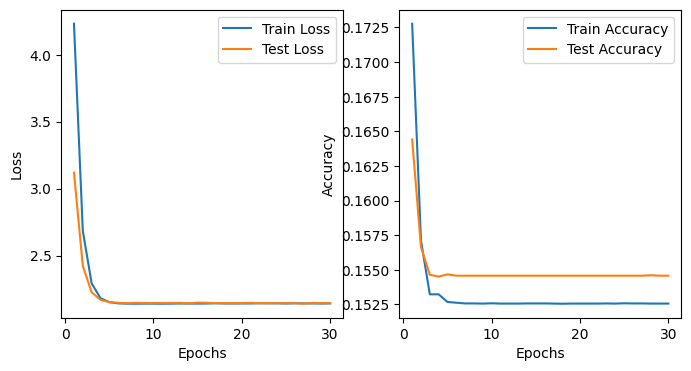

In [ ]:
plt.figure(figsize=(8, 4))

plt.subplot(1, 2, 1)
plt.plot(epochs, train_losses, label='Train Loss')
plt.plot(epochs, test_losses, label='Test Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(epochs, train_accuracies, label='Train Accuracy')
plt.plot(epochs, test_accuracies, label='Test Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

In [ ]:
print("the last loss is ", losses[-1])

the last loss is  2.136609853582179


In [ ]:
user_idx_tensor_test = torch.LongTensor(test_df['user_idx'].values).to(device)
book_idx_tensor_test = torch.LongTensor(test_df['book_idx'].values).to(device)
category_idx_tensor_test = torch.LongTensor(test_df['category_idx'].values).to(device)
sentiment_idx_tensor_test = torch.LongTensor(test_df['sentiment_category'].values).to(device)

model.eval()
with torch.no_grad():
    pred_ratings_test = model(user_idx_tensor_test, book_idx_tensor_test, category_idx_tensor_test, sentiment_idx_tensor_test).squeeze().cpu().numpy()

true_ratings = test_df['overall'].values
true_ratings, pred_ratings_test = true_ratings.reshape(-1), pred_ratings_test.reshape(-1)

ndcg = ndcg_score([true_ratings], [pred_ratings_test])

rmse = np.sqrt(mean_squared_error(true_ratings, pred_ratings_test))
map_score = calculate_map(true_ratings, pred_ratings_test)

print(f"Metrics:\nNDCG: {ndcg:.4f}\nRMSE: {rmse:.4f}\nMAP: {map_score:.4f}")

save_performance_data('cf_with_sentiment', rmse, ndcg, map_score)

Metrics:
NDCG: 0.9888
RMSE: 1.4631
MAP: 0.2249


# sentiment model without category

In [ ]:
sentiment_path = "/content/drive/MyDrive/books_to_kindle_and_books_parquets/books/combined_books_1_with_sentiment.parquet"
result_df = pd.read_parquet(sentiment_path)

In [ ]:
class SentimentNoCategoryModel(nn.Module):
    def __init__(self, n_users, n_books, n_sentiments=4, n_factors=5, y_range=(0, 5.5)):
        super(SentimentNoCategoryModel, self).__init__()
        self.user_factors = nn.Embedding(n_users, n_factors)
        self.user_bias = nn.Embedding(n_users, 1)
        self.book_factors = nn.Embedding(n_books, n_factors)
        self.book_bias = nn.Embedding(n_books, 1)
        self.sentiment_factors = nn.Embedding(n_sentiments, n_factors)
        self.y_range = y_range

    def forward(self, user_idx, book_idx, sentiment_idx):
        user_embed = self.user_factors(user_idx)
        book_embed = self.book_factors(book_idx)
        sentiment_embed = self.sentiment_factors(sentiment_idx)

        user_bias = self.user_bias(user_idx)
        book_bias = self.book_bias(book_idx)

        res = (user_embed * book_embed * sentiment_embed).sum(dim=1, keepdim=True)
        res += user_bias + book_bias
        predicted_rating = torch.sigmoid(res)
        return predicted_rating * (self.y_range[1] - self.y_range[0]) + self.y_range[0]

In [ ]:
# Prepare the data
train_df, test_df = train_test_split(result_df, test_size=0.25)

# Create dictionaries to map user and book IDs to integers
user_to_idx = {user_id: i for i, user_id in enumerate(result_df['reviewerID'].unique())}
book_to_idx = {asin: i for i, asin in enumerate(result_df['asin'].unique())}

train_df['user_idx'] = train_df['reviewerID'].map(user_to_idx)
train_df['book_idx'] = train_df['asin'].map(book_to_idx)
test_df['user_idx'] = test_df['reviewerID'].map(user_to_idx)
test_df['book_idx'] = test_df['asin'].map(book_to_idx)

train_dataset = TensorDataset(
    torch.LongTensor(train_df['user_idx'].values).to(device),
    torch.LongTensor(train_df['book_idx'].values).to(device),
    torch.LongTensor(train_df['sentiment_category'].values).to(device),
    torch.FloatTensor(train_df['overall'].values).to(device)
)
train_loader = DataLoader(train_dataset, batch_size=1024, shuffle=True)

test_dataset = TensorDataset(
    torch.LongTensor(test_df['user_idx'].values).to(device),
    torch.LongTensor(test_df['book_idx'].values).to(device),
    torch.LongTensor(test_df['sentiment_category'].values).to(device),
    torch.FloatTensor(test_df['overall'].values).to(device)
)
test_loader = DataLoader(test_dataset, batch_size=1024, shuffle=False)


In [ ]:
# Initialize the model
n_users = result_df['reviewerID'].nunique()
n_books = result_df['asin'].nunique()
n_sentiments = 4
model = SentimentNoCategoryModel(n_users, n_books, n_sentiments).to(device)

In [ ]:
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.01, weight_decay=0.01)

train_losses = []
test_losses = []
train_accuracies = []
test_accuracies = []

# Training loop
num_epochs = 30
for epoch in range(num_epochs):
    model.train()
    total_train_loss = 0
    correct_train_preds = 0
    total_train_preds = 0

    for user_idx_batch, book_idx_batch, sentiment_idx_batch, ratings_batch in train_loader:
        user_idx_batch, book_idx_batch, sentiment_idx_batch, ratings_batch = user_idx_batch.to(device), book_idx_batch.to(device), sentiment_idx_batch.to(device), ratings_batch.to(device)
        optimizer.zero_grad()
        pred_ratings = model(user_idx_batch, book_idx_batch, sentiment_idx_batch).squeeze()

        loss = criterion(pred_ratings, ratings_batch)
        loss.backward()
        optimizer.step()

        total_train_loss += loss.item()

        predicted_ratings = torch.round(pred_ratings).long()
        correct_train_preds += torch.sum(predicted_ratings == ratings_batch).item()
        total_train_preds += len(ratings_batch)

    avg_train_loss = total_train_loss / len(train_loader)
    avg_train_accuracy = correct_train_preds / total_train_preds
    train_losses.append(avg_train_loss)
    train_accuracies.append(avg_train_accuracy)

    model.eval()
    total_test_loss = 0
    correct_test_preds = 0
    total_test_preds = 0

    with torch.no_grad():
        for user_idx_batch, book_idx_batch, sentiment_idx_batch, ratings_batch in test_loader:
            user_idx_batch, book_idx_batch, sentiment_idx_batch, ratings_batch = user_idx_batch.to(device), book_idx_batch.to(device), sentiment_idx_batch.to(device), ratings_batch.to(device)

            pred_ratings = model(user_idx_batch, book_idx_batch, sentiment_idx_batch).squeeze()
            loss = criterion(pred_ratings, ratings_batch)

            total_test_loss += loss.item()

            predicted_ratings = torch.round(pred_ratings).long()
            correct_test_preds += torch.sum(predicted_ratings == ratings_batch).item()
            total_test_preds += len(ratings_batch)

    avg_test_loss = total_test_loss / len(test_loader)
    avg_test_accuracy = correct_test_preds / total_test_preds
    test_losses.append(avg_test_loss)
    test_accuracies.append(avg_test_accuracy)

In [ ]:
torch.save(model.state_dict(), '/content/drive/MyDrive/models/cf_with_sentiment_no_category.pth')

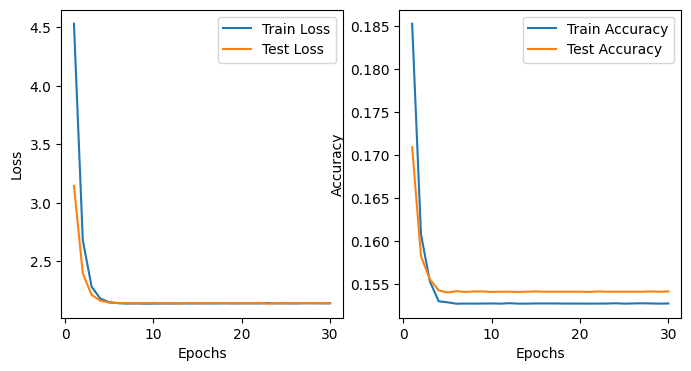

In [ ]:
epochs = range(1, num_epochs + 1)
plt.figure(figsize=(8, 4))

plt.subplot(1, 2, 1)
plt.plot(epochs, train_losses, label='Train Loss')
plt.plot(epochs, test_losses, label='Test Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(epochs, train_accuracies, label='Train Accuracy')
plt.plot(epochs, test_accuracies, label='Test Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

In [ ]:
# Evaluate the model
user_idx_tensor_test = torch.LongTensor(test_df['user_idx'].values).to(device)
book_idx_tensor_test = torch.LongTensor(test_df['book_idx'].values).to(device)
sentiment_idx_tensor_test = torch.LongTensor(test_df['sentiment_category'].values).to(device)

model.eval()
with torch.no_grad():
    pred_ratings_test = model(user_idx_tensor_test, book_idx_tensor_test, sentiment_idx_tensor_test).squeeze().cpu().numpy()

true_ratings = test_df['overall'].values
true_ratings, pred_ratings_test = true_ratings.reshape(-1), pred_ratings_test.reshape(-1)

ndcg = ndcg_score([true_ratings], [pred_ratings_test])
rmse = np.sqrt(mean_squared_error(true_ratings, pred_ratings_test))
map_score = calculate_map(true_ratings, pred_ratings_test)

print(f"Metrics:\nNDCG: {ndcg:.4f}\nRMSE: {rmse:.4f}\nMAP: {map_score:.4f}")

save_performance_data('cf_with_sentiment_no_category', rmse, ndcg, map_score)

Metrics:
NDCG: 0.9886
RMSE: 1.4636
MAP: 0.2286


# Concluding Remarks